In [1]:
import json
import numpy as np
import pandas as pd
from copy import deepcopy

In [2]:
leagueList = ["England", "Spain", "Italy", "Germany", "France"]

In [3]:
#Load json
finalShotData = pd.DataFrame()
for leagueName in leagueList:
    eventsData = pd.json_normalize(json.load(open("data/events_" + leagueName + ".json")))
    eventsShotData = deepcopy(eventsData[eventsData["eventId"] == 10])
    finalShotData = pd.concat([finalShotData, eventsShotData])

In [4]:
finalShotData.head()

eventId subEventName                                               tags  \
46        10         Shot  [{'id': 101}, {'id': 402}, {'id': 201}, {'id':...   
62        10         Shot  [{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...   
91        10         Shot  [{'id': 101}, {'id': 403}, {'id': 201}, {'id':...   
128       10         Shot  [{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...   
249       10         Shot  [{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...   

     playerId                                   positions  matchId eventName  \
46      25413      [{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]  2499719      Shot   
62      26150  [{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]  2499719      Shot   
91      14763  [{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]  2499719      Shot   
128      7868      [{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]  2499719      Shot   
249      7868      [{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]  2499719      Shot   

     teamId matchPeriod    eventSec subEventId         id  
46     1609          1H   94.595788        100  177959212  
62     1631          1H  179.854785        100  177959247  
91     1631          1H  254.745027        100  177959280  
128    1609          1H  425.824035        100  177959289  
249    1609          1H  815.462015        100  177959429

In [5]:
finalShotData.shape

(40461, 12)

In [6]:
finalShotData.reset_index(drop=True, inplace=True)

In [7]:
finalShotData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40461 entries, 0 to 40460
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   eventId       40461 non-null  int64  
 1   subEventName  40461 non-null  object 
 2   tags          40461 non-null  object 
 3   playerId      40461 non-null  int64  
 4   positions     40461 non-null  object 
 5   matchId       40461 non-null  int64  
 6   eventName     40461 non-null  object 
 7   teamId        40461 non-null  int64  
 8   matchPeriod   40461 non-null  object 
 9   eventSec      40461 non-null  float64
 10  subEventId    40461 non-null  object 
 11  id            40461 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 3.7+ MB


In [8]:
pd.DataFrame(finalShotData["positions"].tolist(), index=finalShotData.index)

0                     1
0      {'y': 41, 'x': 88}      {'y': 0, 'x': 0}
1      {'y': 52, 'x': 85}  {'y': 100, 'x': 100}
2      {'y': 52, 'x': 96}  {'y': 100, 'x': 100}
3      {'y': 33, 'x': 81}      {'y': 0, 'x': 0}
4      {'y': 30, 'x': 75}      {'y': 0, 'x': 0}
...                   ...                   ...
40456  {'y': 26, 'x': 87}      {'y': 0, 'x': 0}
40457  {'y': 50, 'x': 89}      {'y': 0, 'x': 0}
40458  {'y': 59, 'x': 91}  {'y': 100, 'x': 100}
40459  {'y': 50, 'x': 95}  {'y': 100, 'x': 100}
40460  {'y': 65, 'x': 87}  {'y': 100, 'x': 100}

[40461 rows x 2 columns]

In [9]:
finalShotData[["startYX", "endYX"]] =\
    pd.DataFrame(finalShotData["positions"].tolist(), index=finalShotData.index)

In [10]:
pd.DataFrame(finalShotData["startYX"].tolist(), index=finalShotData.index)

y   x
0      41  88
1      52  85
2      52  96
3      33  81
4      30  75
...    ..  ..
40456  26  87
40457  50  89
40458  59  91
40459  50  95
40460  65  87

[40461 rows x 2 columns]

In [11]:
pd.DataFrame(finalShotData["endYX"].tolist(), index=finalShotData.index)

y    x
0        0    0
1      100  100
2      100  100
3        0    0
4        0    0
...    ...  ...
40456    0    0
40457    0    0
40458  100  100
40459  100  100
40460  100  100

[40461 rows x 2 columns]

In [12]:
finalShotData[["startY", "startX"]] = pd.DataFrame(finalShotData["startYX"].tolist(), index=finalShotData.index)

In [13]:
finalShotData[["endY", "endX"]] = pd.DataFrame(finalShotData["endYX"].tolist(), index=finalShotData.index)

In [14]:
finalShotData = finalShotData.drop(columns=['positions','startYX','endYX'])

In [15]:
finalShotData.head()

eventId subEventName                                               tags  \
0       10         Shot  [{'id': 101}, {'id': 402}, {'id': 201}, {'id':...   
1       10         Shot  [{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...   
2       10         Shot  [{'id': 101}, {'id': 403}, {'id': 201}, {'id':...   
3       10         Shot  [{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...   
4       10         Shot  [{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...   

   playerId  matchId eventName  teamId matchPeriod    eventSec subEventId  \
0     25413  2499719      Shot    1609          1H   94.595788        100   
1     26150  2499719      Shot    1631          1H  179.854785        100   
2     14763  2499719      Shot    1631          1H  254.745027        100   
3      7868  2499719      Shot    1609          1H  425.824035        100   
4      7868  2499719      Shot    1609          1H  815.462015        100   

          id  startY  startX  endY  endX  
0  177959212      41      88     0     0  
1  177959247      52      85   100   100  
2  177959280      52      96   100   100  
3  177959289      33      81     0     0  
4  177959429      30      75     0     0

In [16]:
pd.DataFrame(finalShotData["tags"].tolist(), index=finalShotData.index)

0             1             2             3             4  \
0      {'id': 101}   {'id': 402}   {'id': 201}  {'id': 1205}  {'id': 1801}   
1      {'id': 401}   {'id': 201}  {'id': 1211}  {'id': 1802}          None   
2      {'id': 101}   {'id': 403}   {'id': 201}  {'id': 1207}  {'id': 1801}   
3      {'id': 401}   {'id': 201}  {'id': 1215}  {'id': 1802}          None   
4      {'id': 402}   {'id': 201}  {'id': 1205}  {'id': 1801}          None   
...            ...           ...           ...           ...           ...   
40456  {'id': 401}   {'id': 201}  {'id': 1205}  {'id': 1801}          None   
40457  {'id': 402}   {'id': 201}  {'id': 1214}  {'id': 1802}          None   
40458  {'id': 401}  {'id': 2101}   {'id': 201}  {'id': 1802}          None   
40459  {'id': 401}   {'id': 201}  {'id': 1201}  {'id': 1801}          None   
40460  {'id': 101}   {'id': 401}   {'id': 201}  {'id': 1208}  {'id': 1801}   

          5  
0      None  
1      None  
2      None  
3      None  
4      None  
...     ...  
40456  None  
40457  None  
40458  None  
40459  None  
40460  None  

[40461 rows x 6 columns]

In [17]:
tagsData = pd.DataFrame(finalShotData["tags"].tolist(), index=finalShotData.index)

In [18]:
tagsData[0].apply(lambda x: x["id"])

0        101
1        401
2        101
3        401
4        402
        ... 
40456    401
40457    402
40458    401
40459    401
40460    101
Name: 0, Length: 40461, dtype: int64

In [19]:
tagsData[0].apply(lambda x: x["id"] if (x != None) else 0)

0        101
1        401
2        101
3        401
4        402
        ... 
40456    401
40457    402
40458    401
40459    401
40460    101
Name: 0, Length: 40461, dtype: int64

In [20]:
for col in tagsData.columns:
    print(101 in tagsData[col].apply(lambda x: x["id"] if (x != None) else 0).unique())

True
False
False
False
False
False


In [21]:
tagsData[0].apply(lambda x: x["id"] if (x != None) else 0) == 101

0         True
1        False
2         True
3        False
4        False
         ...  
40456    False
40457    False
40458    False
40459    False
40460     True
Name: 0, Length: 40461, dtype: bool

In [22]:
goalCond = tagsData[0].apply(lambda x: x["id"] if (x != None) else 0) == 101

In [23]:
finalShotData["goal"] = np.where(goalCond, 1, 0)

In [24]:
finalShotData = finalShotData.drop(columns=['tags'])

In [25]:
finalShotData.head()

eventId subEventName  playerId  matchId eventName  teamId matchPeriod  \
0       10         Shot     25413  2499719      Shot    1609          1H   
1       10         Shot     26150  2499719      Shot    1631          1H   
2       10         Shot     14763  2499719      Shot    1631          1H   
3       10         Shot      7868  2499719      Shot    1609          1H   
4       10         Shot      7868  2499719      Shot    1609          1H   

     eventSec subEventId         id  startY  startX  endY  endX  goal  
0   94.595788        100  177959212      41      88     0     0     1  
1  179.854785        100  177959247      52      85   100   100     0  
2  254.745027        100  177959280      52      96   100   100     1  
3  425.824035        100  177959289      33      81     0     0     0  
4  815.462015        100  177959429      30      75     0     0     0

In [26]:
finalShotData['subEventName'].unique()

array(['Shot'], dtype=object)

In [27]:
finalShotData['subEventId'].unique()

array([100], dtype=object)

In [28]:
finalShotData = finalShotData.drop(columns=['subEventName','subEventId'])

In [29]:
finalShotData.head()

eventId  playerId  matchId eventName  teamId matchPeriod    eventSec  \
0       10     25413  2499719      Shot    1609          1H   94.595788   
1       10     26150  2499719      Shot    1631          1H  179.854785   
2       10     14763  2499719      Shot    1631          1H  254.745027   
3       10      7868  2499719      Shot    1609          1H  425.824035   
4       10      7868  2499719      Shot    1609          1H  815.462015   

          id  startY  startX  endY  endX  goal  
0  177959212      41      88     0     0     1  
1  177959247      52      85   100   100     0  
2  177959280      52      96   100   100     1  
3  177959289      33      81     0     0     0  
4  177959429      30      75     0     0     0

In [30]:
playerlist = pd.json_normalize(json.load(open("data/players.json")))

In [31]:
playerlist.columns

Index(['weight', 'firstName', 'middleName', 'lastName', 'currentTeamId',
       'birthDate', 'height', 'wyId', 'foot', 'shortName',
       'currentNationalTeamId', 'passportArea.name', 'passportArea.id',
       'passportArea.alpha3code', 'passportArea.alpha2code', 'role.code2',
       'role.code3', 'role.name', 'birthArea.name', 'birthArea.id',
       'birthArea.alpha3code', 'birthArea.alpha2code'],
      dtype='object')

In [32]:
playerlist.head()

weight          firstName middleName     lastName currentTeamId  \
0      78              Harun                   Tekin          4502   
1      73             Malang                    Sarr          3775   
2      72               Over                Mandanda          3772   
3      82  Alfred John Momar                 N'Diaye           683   
4      84           Ibrahima             Konat\u00e9          2975   

    birthDate  height    wyId   foot       shortName  ... passportArea.id  \
0  1989-06-17     187   32777  right        H. Tekin  ...             792   
1  1999-01-23     182  393228   left         M. Sarr  ...             686   
2  1998-10-26     176  393230            O. Mandanda  ...             250   
3  1990-03-06     187   32793  right      A. N'Diaye  ...             686   
4  1999-05-25     192  393247  right  I. Konat\u00e9  ...             250   

  passportArea.alpha3code passportArea.alpha2code role.code2 role.code3  \
0                     TUR                      TR         GK        GKP   
1                     SEN                      SN         DF        DEF   
2                     FRA                      FR         GK        GKP   
3                     SEN                      SN         MD        MID   
4                     FRA                      FR         DF        DEF   

    role.name birthArea.name birthArea.id birthArea.alpha3code  \
0  Goalkeeper         Turkey          792                  TUR   
1    Defender         France          250                  FRA   
2  Goalkeeper         France          250                  FRA   
3  Midfielder         France          250                  FRA   
4    Defender         France          250                  FRA   

  birthArea.alpha2code  
0                   TR  
1                   FR  
2                   FR  
3                   FR  
4                   FR  

[5 rows x 22 columns]

In [33]:
merged_data = finalShotData.merge(playerlist[['wyId','firstName', 'lastName', 'foot', 'height', 'weight','role.name']], 
                                  how='left', 
                                  left_on='playerId', 
                                  right_on='wyId')

In [34]:
merged_data.head()

eventId  playerId  matchId eventName  teamId matchPeriod    eventSec  \
0       10     25413  2499719      Shot    1609          1H   94.595788   
1       10     26150  2499719      Shot    1631          1H  179.854785   
2       10     14763  2499719      Shot    1631          1H  254.745027   
3       10      7868  2499719      Shot    1609          1H  425.824035   
4       10      7868  2499719      Shot    1609          1H  815.462015   

          id  startY  startX  endY  endX  goal     wyId  firstName  \
0  177959212      41      88     0     0     1  25413.0  Alexandre   
1  177959247      52      85   100   100     0  26150.0      Riyad   
2  177959280      52      96   100   100     1  14763.0     Shinji   
3  177959289      33      81     0     0     0   7868.0       Alex   
4  177959429      30      75     0     0     0   7868.0       Alex   

             lastName   foot  height  weight   role.name  
0           Lacazette  right   175.0    73.0     Forward  
1              Mahrez   left   179.0    62.0  Midfielder  
2             Okazaki  right   174.0    70.0     Forward  
3  Oxlade-Chamberlain  right   175.0    70.0  Midfielder  
4  Oxlade-Chamberlain  right   175.0    70.0  Midfielder

In [35]:
merged_data.drop(columns=['wyId'], inplace=True)

In [36]:
def check_ids(row):
    if {'id': 401} in row.values:
        return 'left'
    elif {'id': 402} in row.values:
        return 'right'
    elif {'id': 403} in row.values:
        return 'header'
    else:
        return None

tagsData['eventfoot'] = tagsData.apply(check_ids, axis=1)
print(tagsData.head())

             0            1             2             3             4     5  \
0  {'id': 101}  {'id': 402}   {'id': 201}  {'id': 1205}  {'id': 1801}  None   
1  {'id': 401}  {'id': 201}  {'id': 1211}  {'id': 1802}          None  None   
2  {'id': 101}  {'id': 403}   {'id': 201}  {'id': 1207}  {'id': 1801}  None   
3  {'id': 401}  {'id': 201}  {'id': 1215}  {'id': 1802}          None  None   
4  {'id': 402}  {'id': 201}  {'id': 1205}  {'id': 1801}          None  None   

  eventfoot  
0     right  
1      left  
2    header  
3      left  
4     right  


In [37]:
merged_data['eventfoot'] = tagsData['eventfoot']

In [38]:
merged_data.head()

eventId  playerId  matchId eventName  teamId matchPeriod    eventSec  \
0       10     25413  2499719      Shot    1609          1H   94.595788   
1       10     26150  2499719      Shot    1631          1H  179.854785   
2       10     14763  2499719      Shot    1631          1H  254.745027   
3       10      7868  2499719      Shot    1609          1H  425.824035   
4       10      7868  2499719      Shot    1609          1H  815.462015   

          id  startY  startX  endY  endX  goal  firstName            lastName  \
0  177959212      41      88     0     0     1  Alexandre           Lacazette   
1  177959247      52      85   100   100     0      Riyad              Mahrez   
2  177959280      52      96   100   100     1     Shinji             Okazaki   
3  177959289      33      81     0     0     0       Alex  Oxlade-Chamberlain   
4  177959429      30      75     0     0     0       Alex  Oxlade-Chamberlain   

    foot  height  weight   role.name eventfoot  
0  right   175.0    73.0     Forward     right  
1   left   179.0    62.0  Midfielder      left  
2  right   174.0    70.0     Forward    header  
3  right   175.0    70.0  Midfielder      left  
4  right   175.0    70.0  Midfielder     right

In [39]:
def foot_strength(row):
    if row['eventfoot'] == 'header':
        return 'header'
    elif row['foot'] == row['eventfoot']:
        return 'strong foot'
    else:
        return 'weak foot'

merged_data['shot_foot'] = merged_data.apply(foot_strength, axis=1)

In [40]:
merged_data.head()

eventId  playerId  matchId eventName  teamId matchPeriod    eventSec  \
0       10     25413  2499719      Shot    1609          1H   94.595788   
1       10     26150  2499719      Shot    1631          1H  179.854785   
2       10     14763  2499719      Shot    1631          1H  254.745027   
3       10      7868  2499719      Shot    1609          1H  425.824035   
4       10      7868  2499719      Shot    1609          1H  815.462015   

          id  startY  startX  ...  endX  goal  firstName            lastName  \
0  177959212      41      88  ...     0     1  Alexandre           Lacazette   
1  177959247      52      85  ...   100     0      Riyad              Mahrez   
2  177959280      52      96  ...   100     1     Shinji             Okazaki   
3  177959289      33      81  ...     0     0       Alex  Oxlade-Chamberlain   
4  177959429      30      75  ...     0     0       Alex  Oxlade-Chamberlain   

    foot height  weight   role.name eventfoot    shot_foot  
0  right  175.0    73.0     Forward     right  strong foot  
1   left  179.0    62.0  Midfielder      left  strong foot  
2  right  174.0    70.0     Forward    header       header  
3  right  175.0    70.0  Midfielder      left    weak foot  
4  right  175.0    70.0  Midfielder     right  strong foot  

[5 rows x 21 columns]

In [41]:
merged_data.drop(columns=['eventfoot','eventId','eventName'], inplace=True)

In [42]:
merged_data.head()

playerId  matchId  teamId matchPeriod    eventSec         id  startY  \
0     25413  2499719    1609          1H   94.595788  177959212      41   
1     26150  2499719    1631          1H  179.854785  177959247      52   
2     14763  2499719    1631          1H  254.745027  177959280      52   
3      7868  2499719    1609          1H  425.824035  177959289      33   
4      7868  2499719    1609          1H  815.462015  177959429      30   

   startX  endY  endX  goal  firstName            lastName   foot  height  \
0      88     0     0     1  Alexandre           Lacazette  right   175.0   
1      85   100   100     0      Riyad              Mahrez   left   179.0   
2      96   100   100     1     Shinji             Okazaki  right   174.0   
3      81     0     0     0       Alex  Oxlade-Chamberlain  right   175.0   
4      75     0     0     0       Alex  Oxlade-Chamberlain  right   175.0   

   weight   role.name    shot_foot  
0    73.0     Forward  strong foot  
1    62.0  Midfielder  strong foot  
2    70.0     Forward       header  
3    70.0  Midfielder    weak foot  
4    70.0  Midfielder  strong foot

In [43]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40461 entries, 0 to 40460
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   playerId     40461 non-null  int64  
 1   matchId      40461 non-null  int64  
 2   teamId       40461 non-null  int64  
 3   matchPeriod  40461 non-null  object 
 4   eventSec     40461 non-null  float64
 5   id           40461 non-null  int64  
 6   startY       40461 non-null  int64  
 7   startX       40461 non-null  int64  
 8   endY         40461 non-null  int64  
 9   endX         40461 non-null  int64  
 10  goal         40461 non-null  int64  
 11  firstName    40458 non-null  object 
 12  lastName     40458 non-null  object 
 13  foot         40458 non-null  object 
 14  height       40458 non-null  float64
 15  weight       40458 non-null  float64
 16  role.name    40458 non-null  object 
 17  shot_foot    40461 non-null  object 
dtypes: float64(3), int64(9), object(6)
memory usag

In [44]:
merged_data.isnull().sum()

playerId       0
matchId        0
teamId         0
matchPeriod    0
eventSec       0
id             0
startY         0
startX         0
endY           0
endX           0
goal           0
firstName      3
lastName       3
foot           3
height         3
weight         3
role.name      3
shot_foot      0
dtype: int64

In [45]:
merged_data.dropna(inplace=True)

In [46]:
merged_data.isnull().sum()

playerId       0
matchId        0
teamId         0
matchPeriod    0
eventSec       0
id             0
startY         0
startX         0
endY           0
endX           0
goal           0
firstName      0
lastName       0
foot           0
height         0
weight         0
role.name      0
shot_foot      0
dtype: int64

In [47]:
merged_data.describe()

playerId       matchId        teamId      eventSec            id  \
count   40458.000000  4.045800e+04  40458.000000  40458.000000  4.045800e+04   
mean    96666.318750  2.532575e+06   2607.857902   1472.327127  2.173399e+08   
std    122838.088397  3.319150e+04   2209.194665    818.662880  2.145643e+07   
min        36.000000  2.499719e+06    674.000000      1.238426  1.761217e+08   
25%     11294.000000  2.500764e+06   1612.000000    762.299077  1.989030e+08   
50%     25715.000000  2.516887e+06   2455.000000   1480.584749  2.181691e+08   
75%    173214.000000  2.565869e+06   3197.000000   2181.203862  2.337738e+08   
max    564512.000000  2.576338e+06  19830.000000   3490.826794  2.557092e+08   

             startY        startX          endY          endX          goal  \
count  40458.000000  40458.000000  40458.000000  40458.000000  40458.000000   
mean      49.232537     84.828266     44.522715     44.522715      0.105566   
std       13.761569      8.096794     49.699702     49.699702      0.307285   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%       39.000000     79.000000      0.000000      0.000000      0.000000   
50%       49.000000     87.000000      0.000000      0.000000      0.000000   
75%       60.000000     91.000000    100.000000    100.000000      0.000000   
max      100.000000    100.000000    100.000000    100.000000      1.000000   

             height        weight  
count  40458.000000  40458.000000  
mean     181.057813     75.423427  
std        6.792741      6.950713  
min        0.000000      0.000000  
25%      177.000000     71.000000  
50%      181.000000     75.000000  
75%      185.000000     80.000000  
max      203.000000    101.000000

In [48]:
merged_data = merged_data.reset_index(drop=True)

In [49]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Encode categorical variables
label_encoder = LabelEncoder()
merged_data['shot_foot'] = label_encoder.fit_transform(merged_data['shot_foot'])

# Select features for PCA
features = ['startY', 'startX', 'endY', 'endX', 'goal', 'height', 'weight', 'shot_foot']

# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_data[features])

# Perform PCA
pca = PCA(n_components=2)  # Specify the number of components you want to retain
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame to store the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the principal components DataFrame with the original DataFrame
final_df = pd.concat([principal_df, merged_data[['playerId', 'matchId', 
                                                 'teamId', 'matchPeriod', 'eventSec', 'id', 'role.name']]], axis=1)

# Display the final DataFrame with principal components
print(final_df.head())

        PC1       PC2  playerId  matchId  teamId matchPeriod    eventSec  \
0 -1.299776  0.485432     25413  2499719    1609          1H   94.595788   
1  1.680141  1.306203     26150  2499719    1631          1H  179.854785   
2  1.446675 -0.166254     14763  2499719    1631          1H  254.745027   
3 -1.093593  1.861485      7868  2499719    1609          1H  425.824035   
4 -1.116094  1.566636      7868  2499719    1609          1H  815.462015   

          id   role.name  
0  177959212     Forward  
1  177959247  Midfielder  
2  177959280     Forward  
3  177959289  Midfielder  
4  177959429  Midfielder  


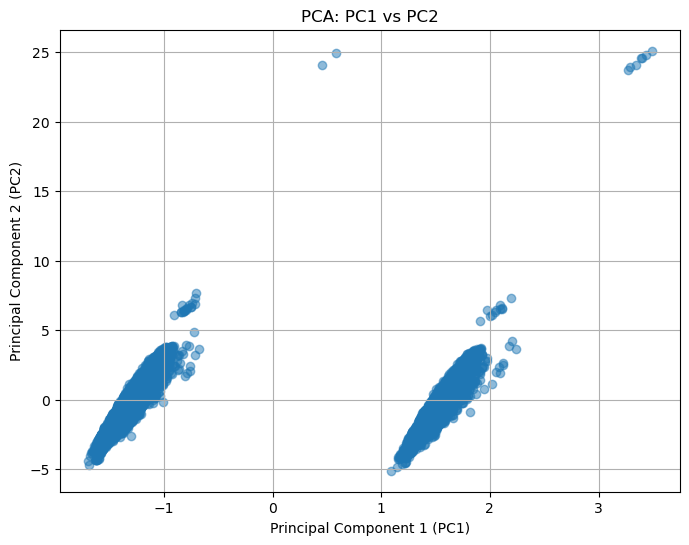

In [50]:
import matplotlib.pyplot as plt

# Scatter plot of PC1 vs PC2
plt.figure(figsize=(8, 6))
plt.scatter(final_df['PC1'], final_df['PC2'], alpha=0.5)
plt.title('PCA: PC1 vs PC2')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import mplsoccer

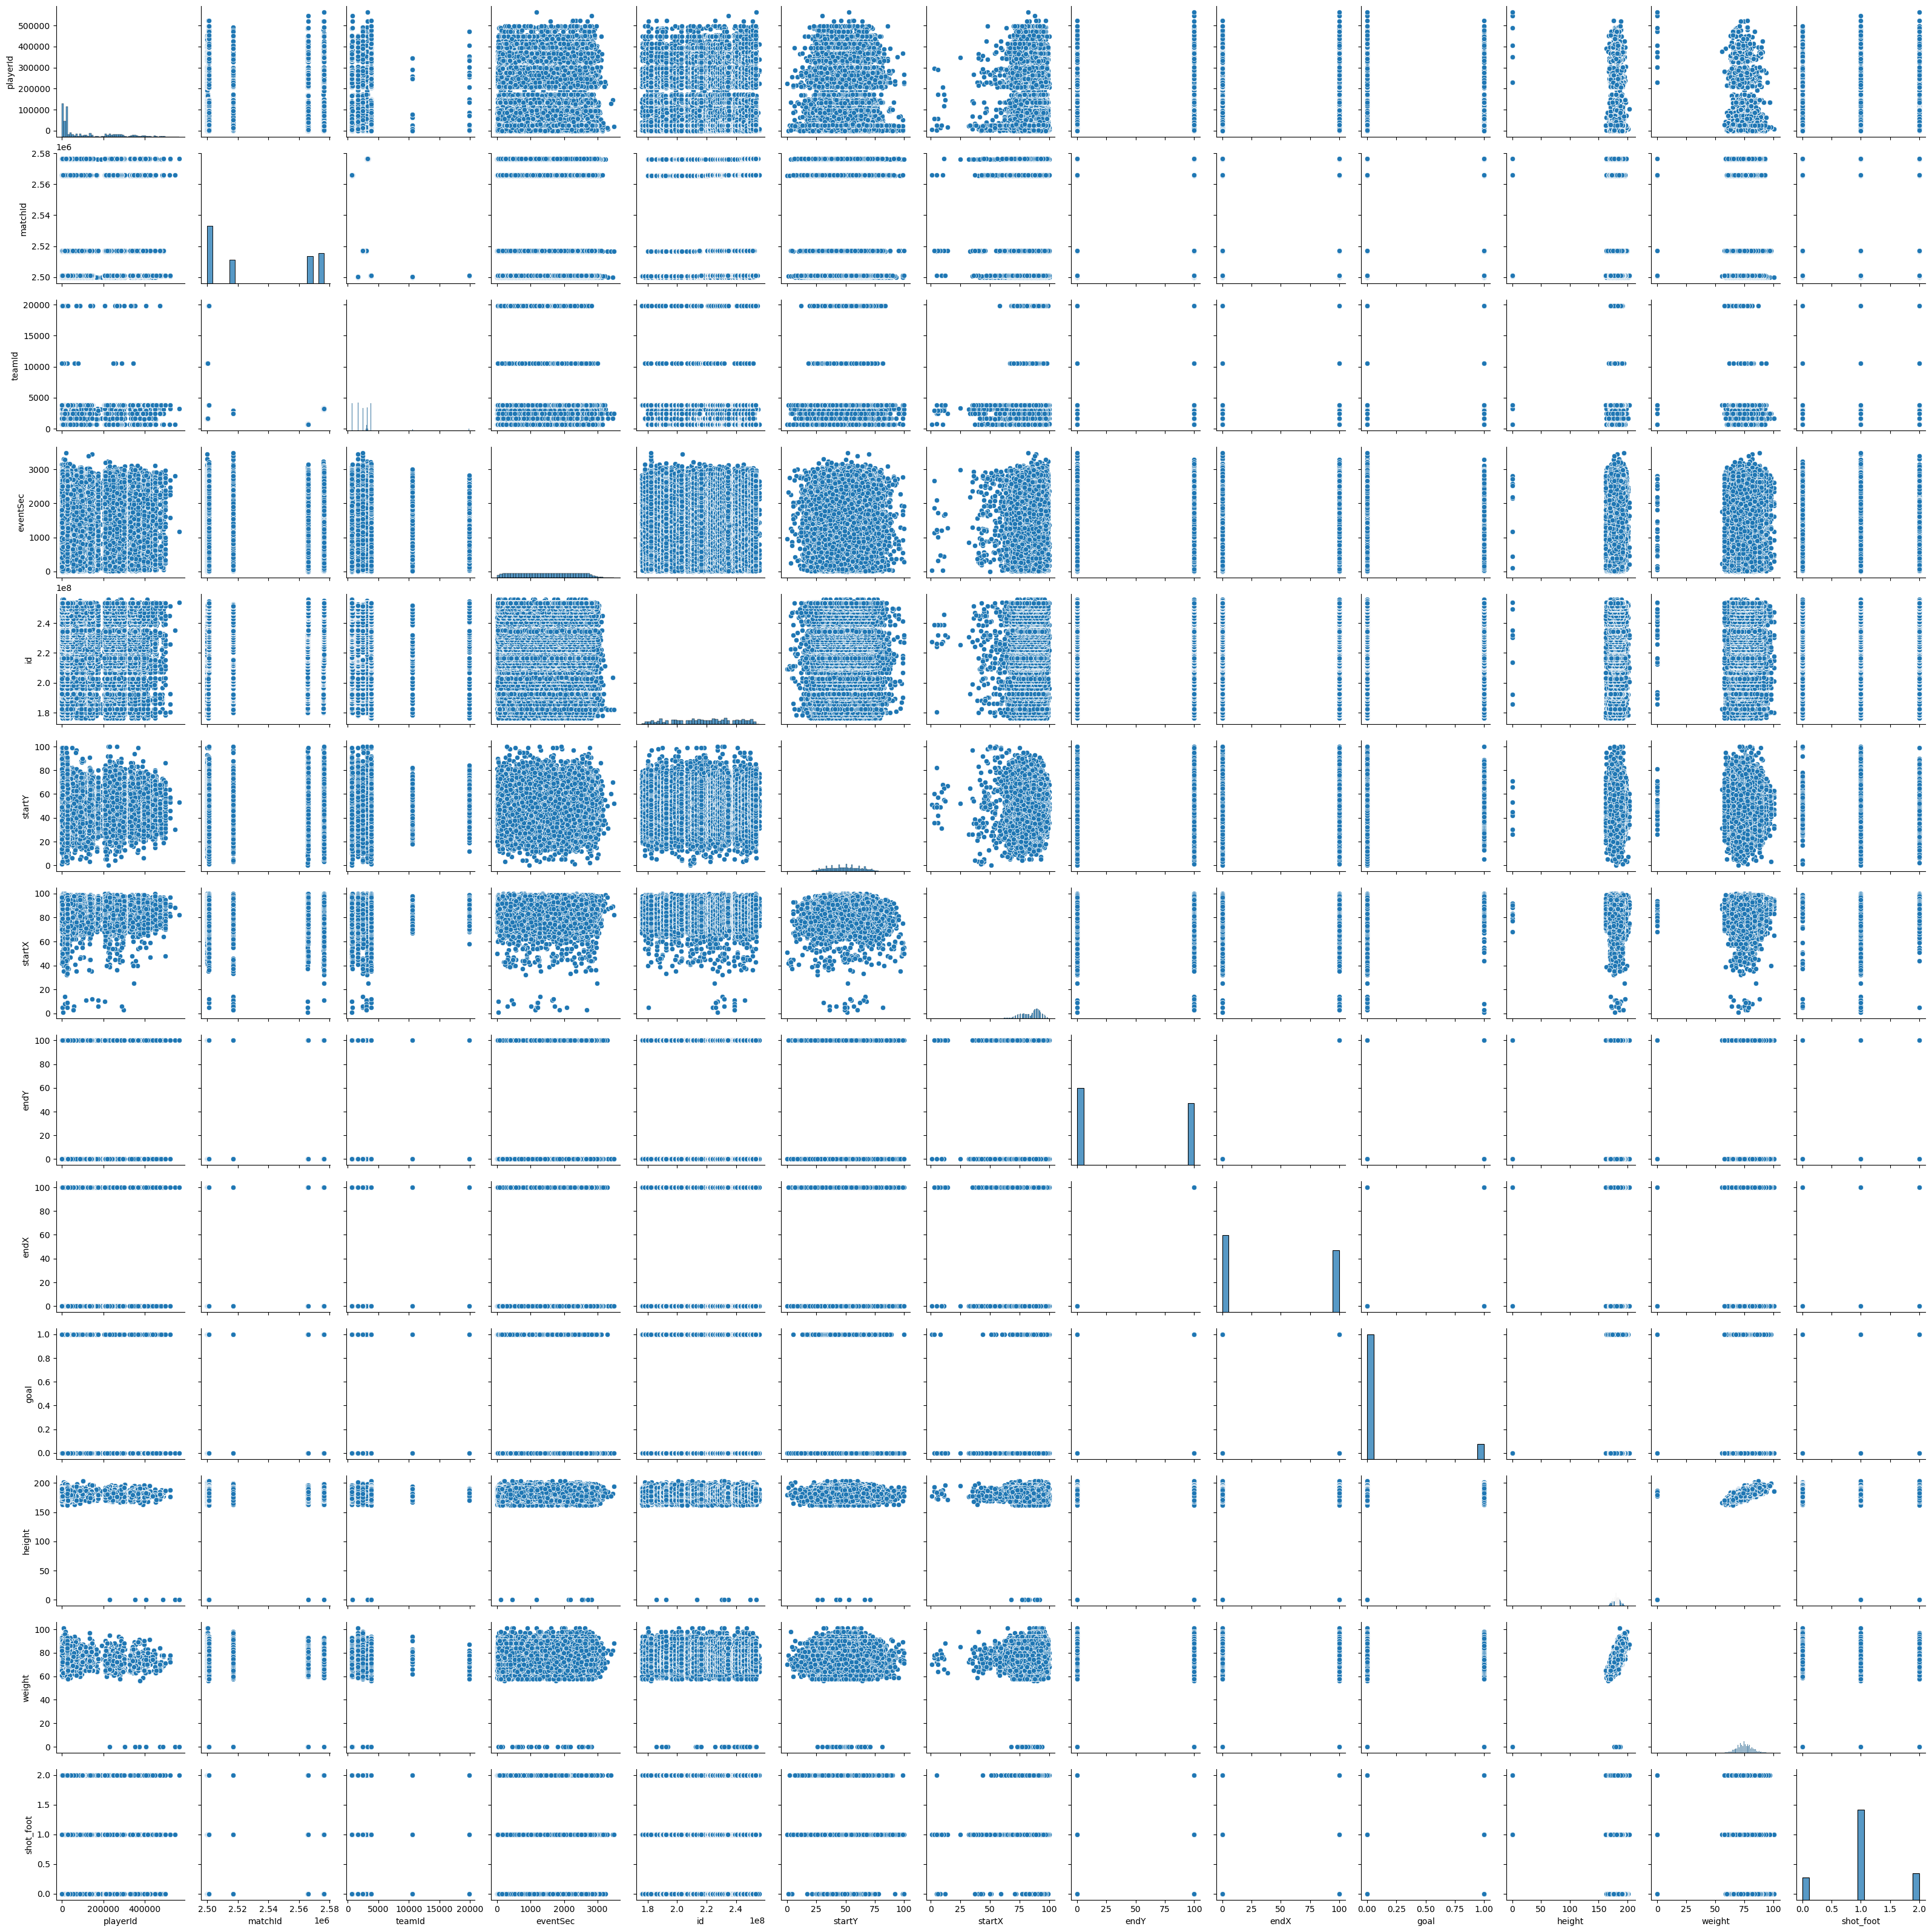

In [52]:
sns.pairplot(merged_data)
plt.show()

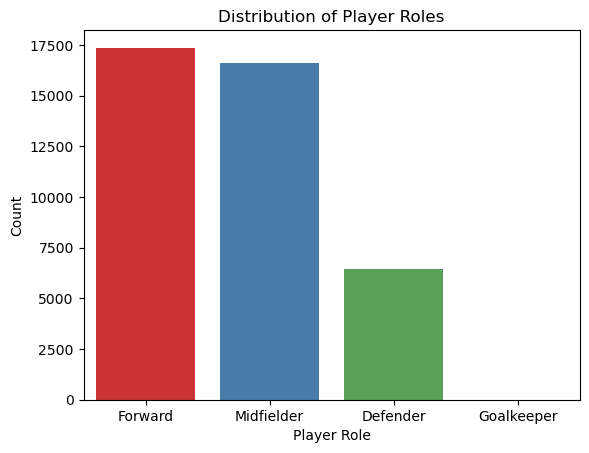

In [53]:
sns.countplot(data=merged_data, x='role.name', palette='Set1')
plt.title('Distribution of Player Roles')
plt.xlabel('Player Role')
plt.ylabel('Count')
plt.show()

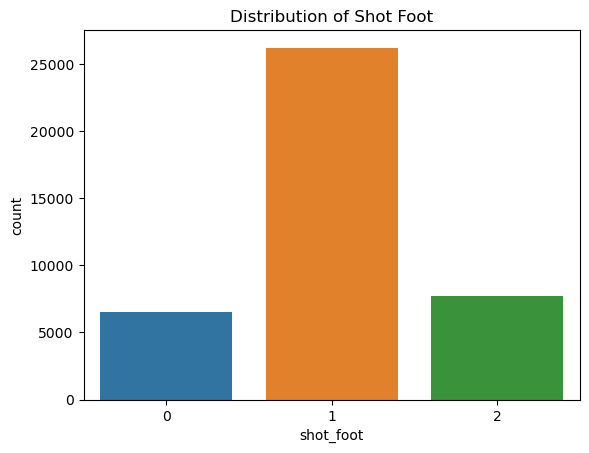

In [54]:
sns.countplot(x='shot_foot', data=merged_data)
plt.title('Distribution of Shot Foot')
plt.show()

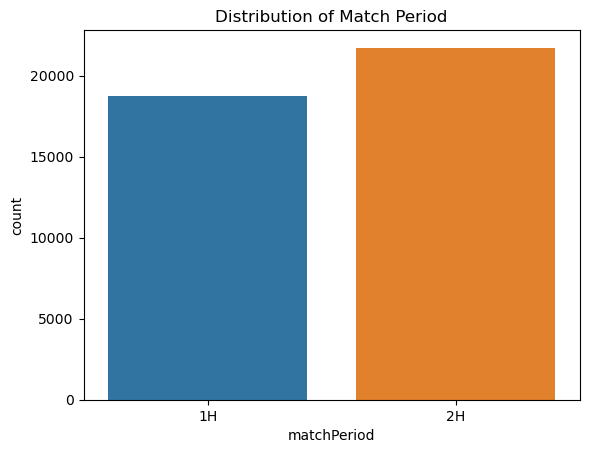

In [55]:
sns.countplot(x='matchPeriod', data=merged_data)
plt.title('Distribution of Match Period')
plt.show()

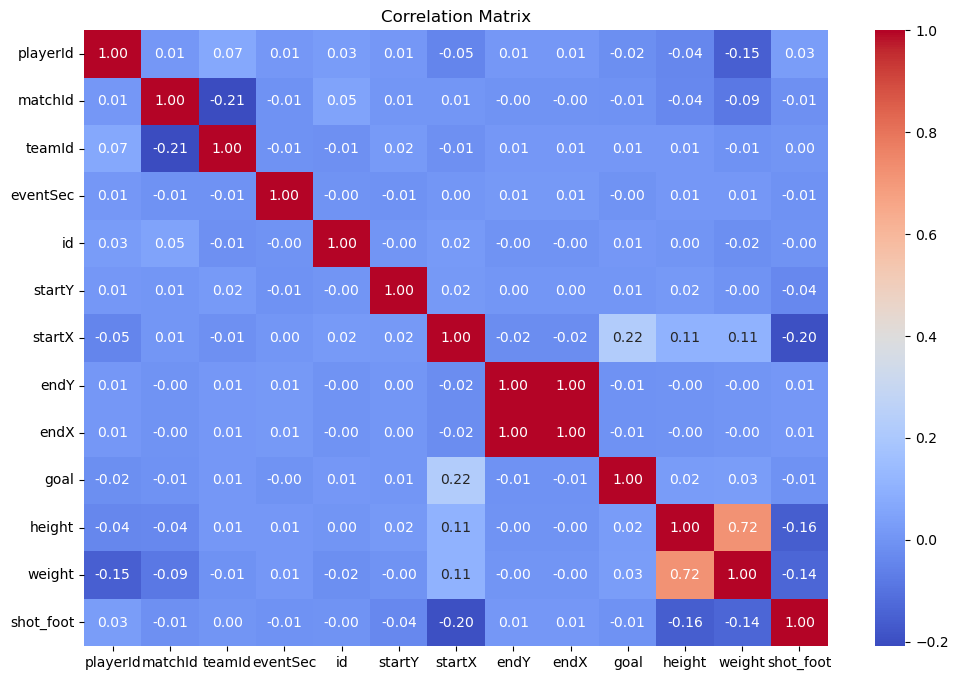

In [56]:
numerical_columns = merged_data.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = merged_data[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

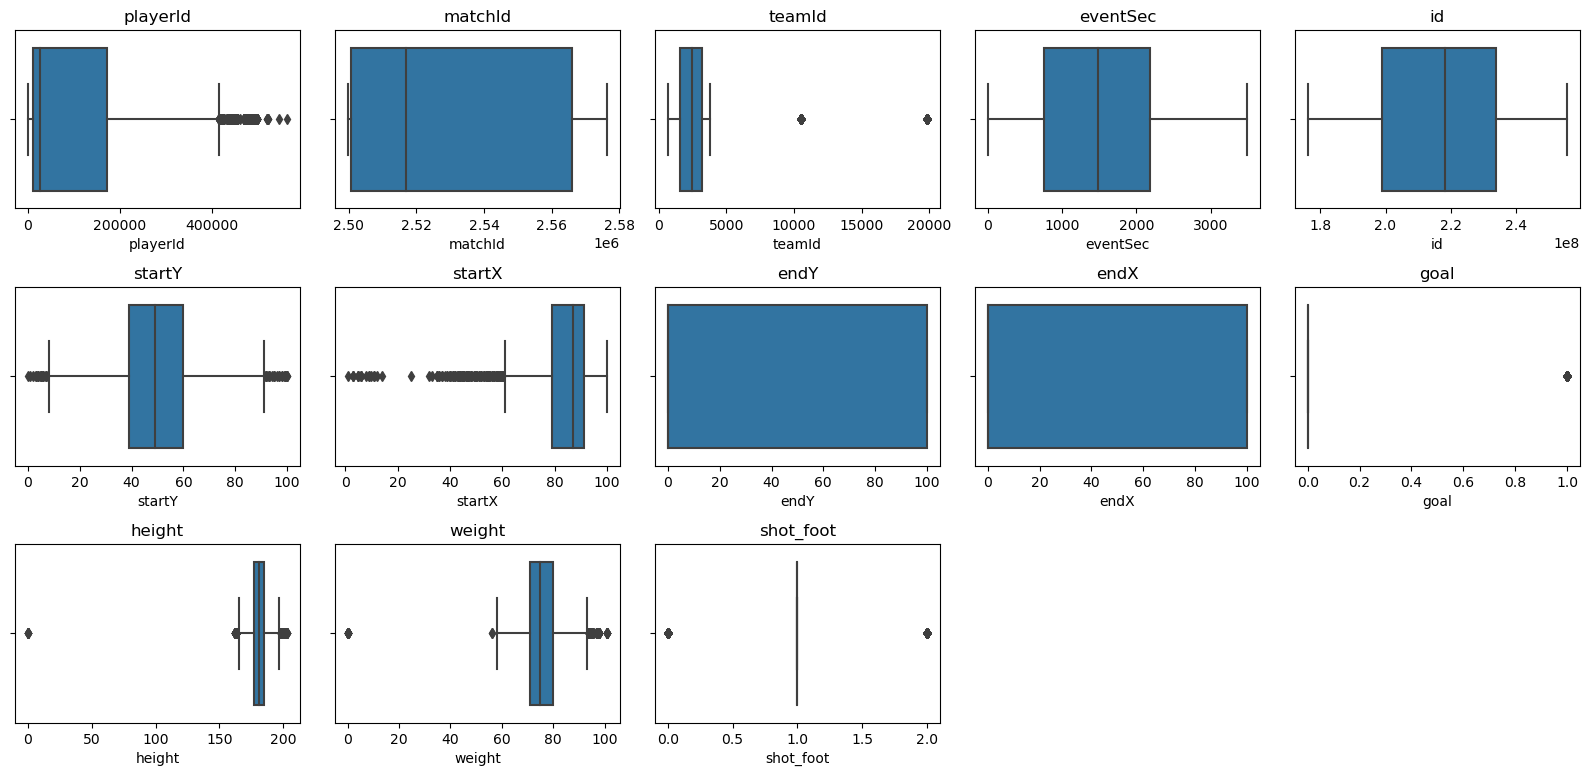

In [57]:
numeric_columns = merged_data.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(16, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x=merged_data[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

In [58]:
merged_data['height'].unique()

array([175., 179., 174., 185., 183., 180., 178., 192., 184., 173., 193.,
       181., 191., 188., 189., 168., 197., 190., 195., 170., 176., 201.,
       169., 177., 187., 194., 182., 172., 186., 171., 163., 167., 165.,
       198., 196.,   0., 199., 162., 166., 203.])

In [59]:
merged_data['weight'].unique()

array([ 73.,  62.,  70.,  82.,  85.,  76.,  74.,  88.,  67.,  78.,  81.,
        72.,  68.,  90.,  84.,  71.,  66.,  83.,  79.,  63.,  65.,  91.,
        75.,  94.,  86.,  80.,  60.,  77.,  87.,  69., 101.,  64.,  95.,
        61.,  89.,  92.,  59.,  97.,  93.,   0.,  98.,  58.,  96.,  56.])

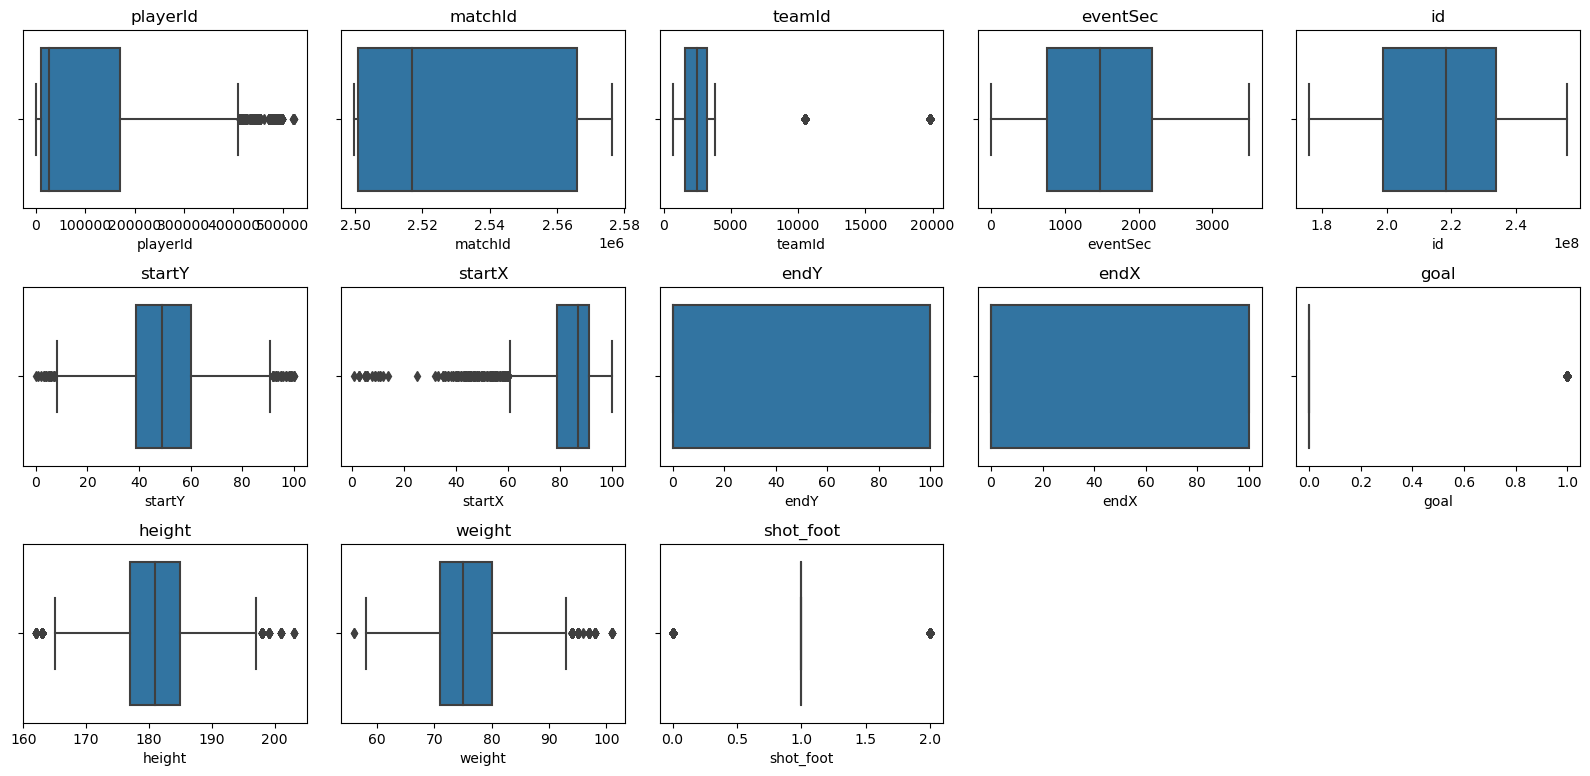

In [60]:
merged_data = merged_data[merged_data['height'] != 0]
merged_data = merged_data[merged_data['weight'] != 0]
plt.figure(figsize=(16, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x=merged_data[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

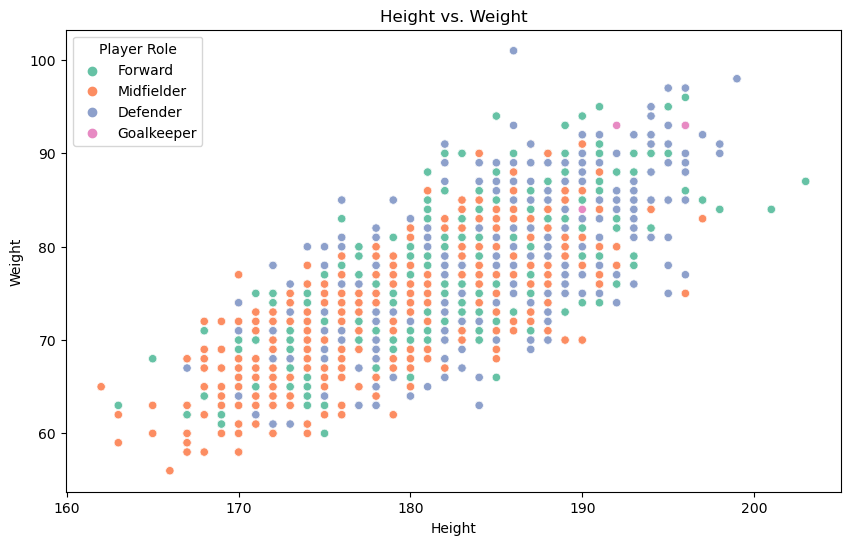

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='height', y='weight', hue='role.name', palette='Set2')
plt.title('Height vs. Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='Player Role', loc='upper left')
plt.show()

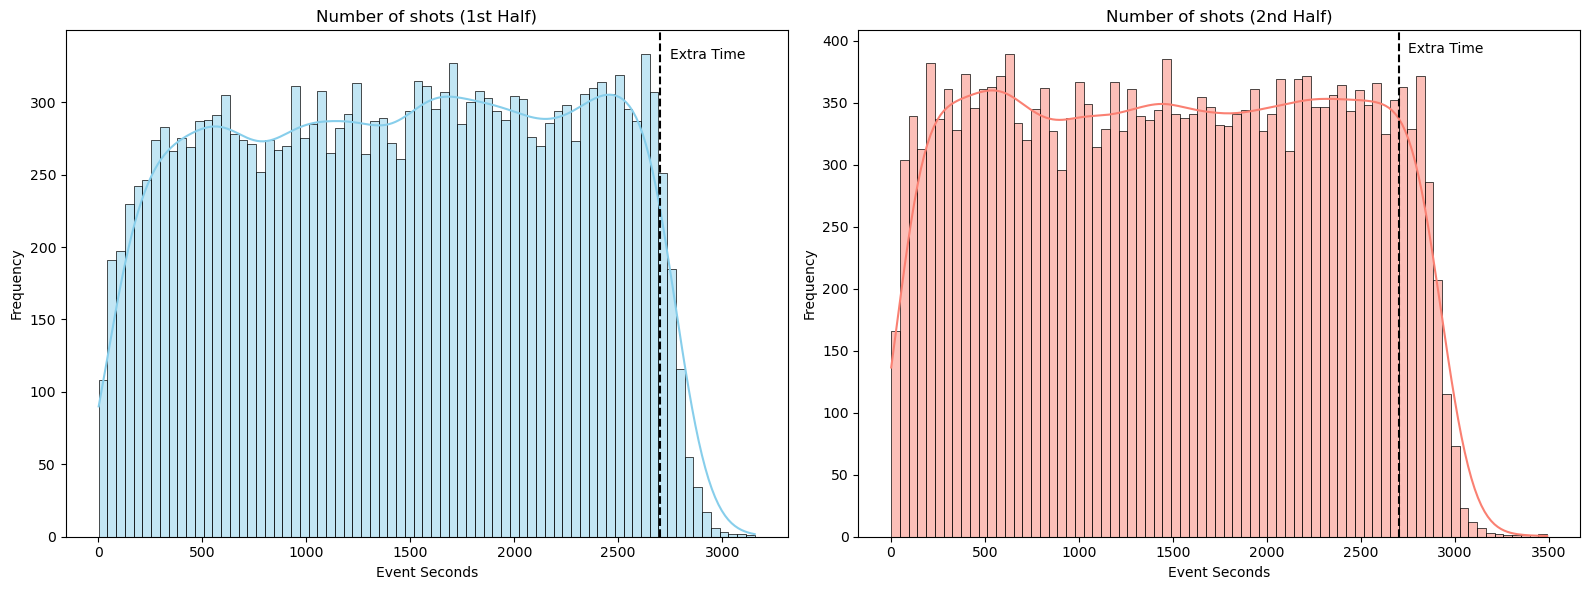

In [62]:
# Filter data for 1st half
merged_data_1h = merged_data[merged_data['matchPeriod'] == '1H']

# Filter data for 2nd half
merged_data_2h = merged_data[merged_data['matchPeriod'] == '2H']

# Create subplots for side-by-side histograms
plt.figure(figsize=(16, 6))

# Plot histogram for 1st half
plt.subplot(1, 2, 1)
sns.histplot(data=merged_data_1h, x='eventSec', bins=75, kde=True, color='skyblue')
plt.title('Number of shots (1st Half)')
plt.xlabel('Event Seconds')
plt.ylabel('Frequency')
plt.axvline(x=2700, color='black', linestyle='--')
plt.text(2750, 330, 'Extra Time', color='black')

# Plot histogram for 2nd half
plt.subplot(1, 2, 2)
sns.histplot(data=merged_data_2h, x='eventSec', bins=75, kde=True, color='salmon')
plt.title('Number of shots (2nd Half)')
plt.xlabel('Event Seconds')
plt.ylabel('Frequency')
plt.axvline(x=2700, color='black', linestyle='--')
plt.text(2750, 390, 'Extra Time', color='black')

plt.tight_layout()
plt.show()

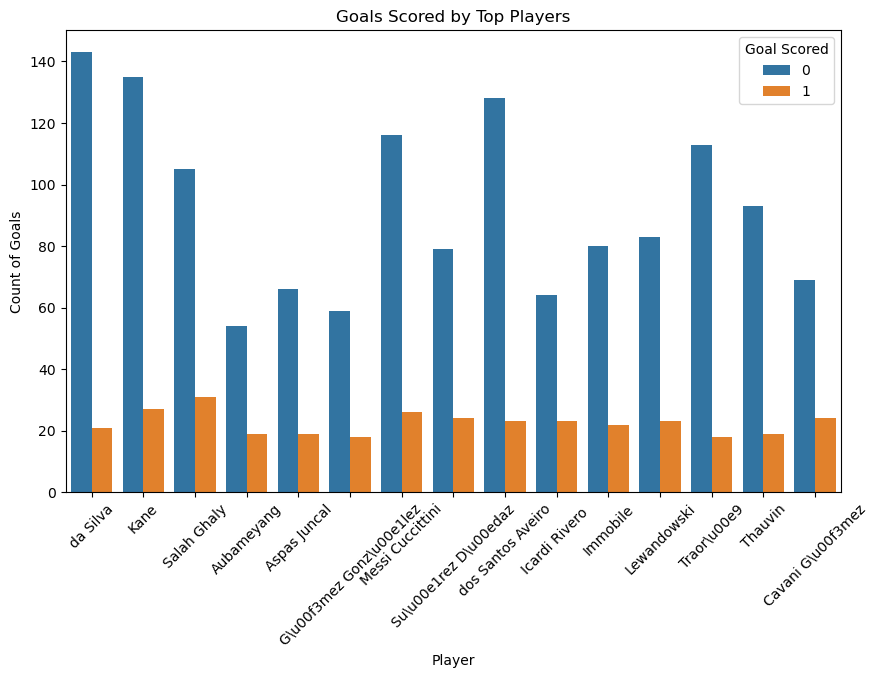

In [63]:
player_goals = merged_data.groupby('lastName')['goal'].sum().reset_index()
top_players = player_goals.nlargest(15, 'goal')  
merged_data_top = merged_data[merged_data['lastName'].isin(top_players['lastName'])]

plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data_top, x='lastName', hue='goal')
plt.title('Goals Scored by Top Players')
plt.xlabel('Player')
plt.ylabel('Count of Goals')
plt.legend(title='Goal Scored', loc='upper right')
plt.xticks(rotation=45)
plt.show()

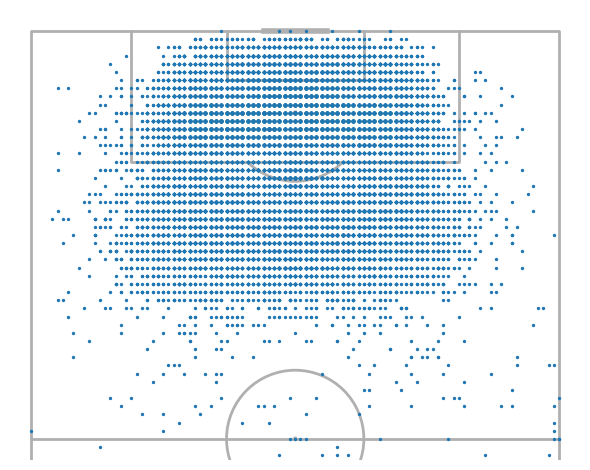

In [64]:
pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                                half=True)
fig, ax = pitch.draw()
pitch.scatter(merged_data["startX"],
              merged_data["startY"],
              ax=ax, s=2)

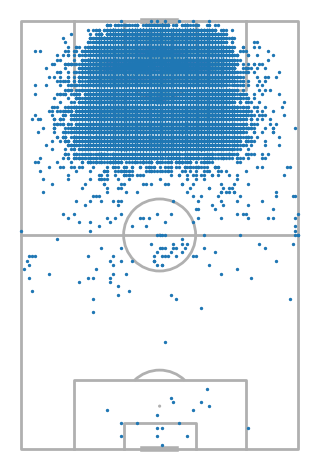

In [65]:
pitch = mplsoccer.VerticalPitch(pitch_type="wyscout")
fig, ax = pitch.draw()
pitch.scatter(merged_data["startX"],
              merged_data["startY"],
              ax=ax, s=2)

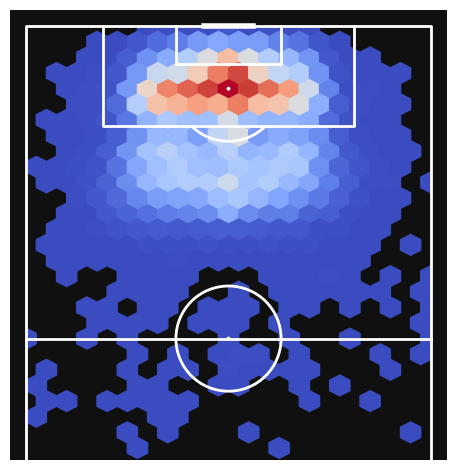

In [66]:
pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                        pitch_color="#101010",
                        line_color="#ffffff",
                        half=True,
                        pad_bottom=30,
                                line_zorder=2)
fig, ax = pitch.draw()
pitch.hexbin(merged_data["startX"],
             merged_data["startY"],
             gridsize=(20, 20), ax=ax,
             cmap="coolwarm")

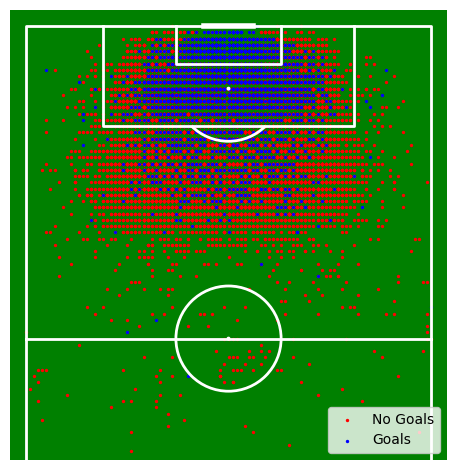

In [67]:
pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                        pitch_color="green",
                        line_color="#ffffff",
                        half=True,
                        pad_bottom=30,
                                line_zorder=2)
fig, ax = pitch.draw()

no_goal_shots = merged_data[merged_data['goal'] == 0]
pitch.scatter(no_goal_shots["startX"], no_goal_shots["startY"], ax=ax, color='red', label='No Goals', s=2)

goal_shots = merged_data[merged_data['goal'] == 1]
pitch.scatter(goal_shots["startX"], goal_shots["startY"], ax=ax, color='blue', label='Goals', s=2)


plt.legend()
plt.show()

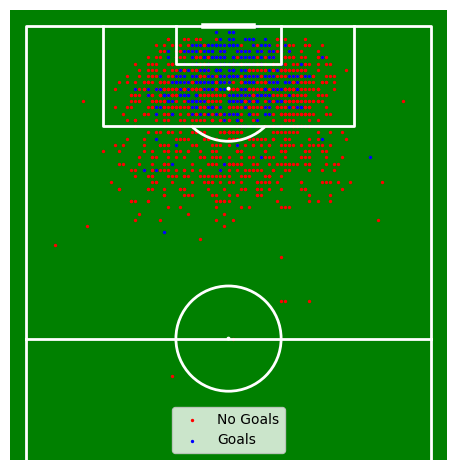

In [68]:
pitch = mplsoccer.VerticalPitch(pitch_type="wyscout",
                        pitch_color="green",
                        line_color="#ffffff",
                        half=True,
                        pad_bottom=30,
                                line_zorder=2)
fig, ax = pitch.draw()

no_goal_shots = merged_data_top[merged_data_top['goal'] == 0]
pitch.scatter(no_goal_shots["startX"], no_goal_shots["startY"], ax=ax, color='red', label='No Goals', s=2)

goal_shots = merged_data_top[merged_data_top['goal'] == 1]
pitch.scatter(goal_shots["startX"], goal_shots["startY"], ax=ax, color='blue', label='Goals', s=2)


plt.legend()
plt.show()

In [69]:
from scipy.stats import chi2_contingency

# Contingency table of foot and goal
contingency_table = pd.crosstab(merged_data['shot_foot'], merged_data['goal'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2)
print("P-value:", p)

Chi-squared statistic: 46.202173189667654
P-value: 9.275248755192316e-11


In [70]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(merged_data['playerId'], merged_data['goal'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 2656.091664431834
p-value: 1.3642262386352613e-15


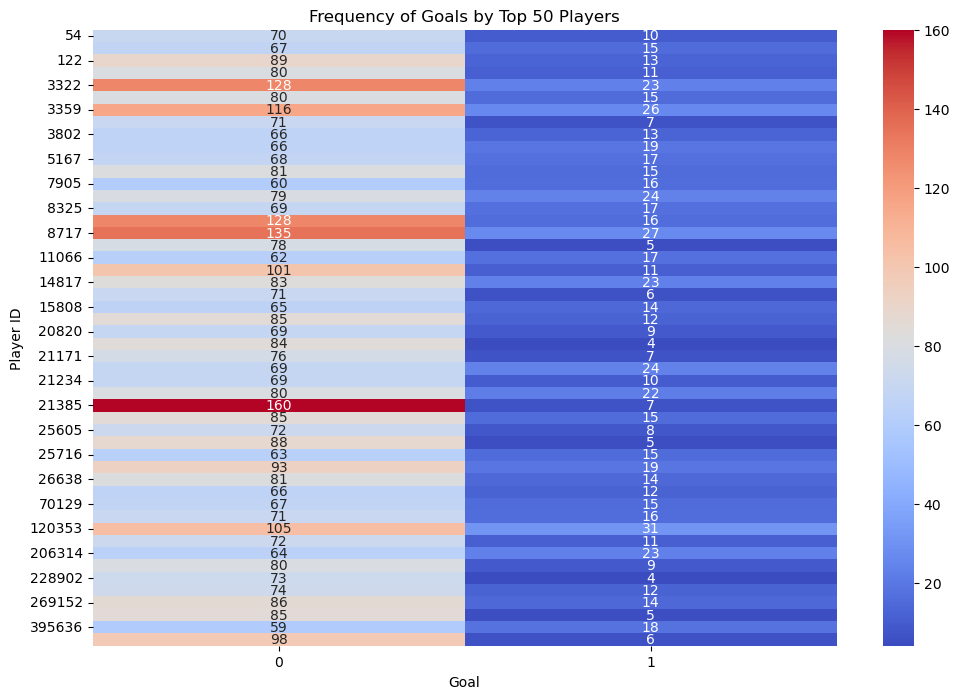

In [71]:
top_50_players = merged_data['playerId'].value_counts().nlargest(50).index

# Filter DataFrame for top 50 players
df_top_50 = merged_data[merged_data['playerId'].isin(top_50_players)]

# Create a cross-tabulation
cross_tab = pd.crosstab(df_top_50['playerId'], df_top_50['goal'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Frequency of Goals by Top 50 Players')
plt.xlabel('Goal')
plt.ylabel('Player ID')
plt.show()

In [72]:
merged_data

playerId  matchId  teamId matchPeriod     eventSec         id  startY  \
0         25413  2499719    1609          1H    94.595788  177959212      41   
1         26150  2499719    1631          1H   179.854785  177959247      52   
2         14763  2499719    1631          1H   254.745027  177959280      52   
3          7868  2499719    1609          1H   425.824035  177959289      33   
4          7868  2499719    1609          1H   815.462015  177959429      30   
...         ...      ...     ...         ...          ...        ...     ...   
40453    454388  2501065    3795          2H  2369.402969  253316844      26   
40454    219350  2501065    3795          2H  2411.702771  253316856      50   
40455      3450  2501065   19830          2H  2506.631437  253316896      59   
40456     28922  2501065   19830          2H  2508.341627  253316898      50   
40457    405977  2501065   19830          2H  2821.203869  253316980      65   

       startX  endY  endX  goal       firstName                 lastName  \
0          88     0     0     1       Alexandre                Lacazette   
1          85   100   100     0           Riyad                   Mahrez   
2          96   100   100     1          Shinji                  Okazaki   
3          81     0     0     0            Alex       Oxlade-Chamberlain   
4          75     0     0     0            Alex       Oxlade-Chamberlain   
...       ...   ...   ...   ...             ...                      ...   
40453      87     0     0     0           Bryan                   Mbeumo   
40454      89     0     0     0           Adama                    Niane   
40455      91   100   100     0  Radamel Falcao  Garc\u00eda Z\u00e1rate   
40456      95   100   100     0          Thomas                    Lemar   
40457      87   100   100     1           Jordi           Mboula Queralt   

        foot  height  weight   role.name  shot_foot  
0      right   175.0    73.0     Forward          1  
1       left   179.0    62.0  Midfielder          1  
2      right   174.0    70.0     Forward          0  
3      right   175.0    70.0  Midfielder          2  
4      right   175.0    70.0  Midfielder          1  
...      ...     ...     ...         ...        ...  
40453   left   171.0    65.0     Forward          1  
40454  right   181.0    71.0     Forward          1  
40455  right   177.0    72.0     Forward          2  
40456   left   170.0    58.0  Midfielder          1  
40457  right   183.0    74.0     Forward          2  

[40420 rows x 18 columns]

In [73]:
merged_data = merged_data.reset_index(drop=True)

In [74]:
x1 = merged_data["startX"]
x2 = pd.Series([100]*len(merged_data))
y1 = merged_data["startY"]
y2 = pd.Series([50]*len(merged_data))

In [75]:
np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

0        15.000000
1        15.132746
2         4.472136
3        25.495098
4        32.015621
           ...    
40415    27.294688
40416    11.000000
40417    12.727922
40418     5.000000
40419    19.849433
Length: 40420, dtype: float64

In [76]:
merged_data["shotDist"] = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

In [77]:
x2 = pd.Series([100]*len(merged_data))
y2 = pd.Series([46]*len(merged_data))
x3 = pd.Series([100]*len(merged_data))
y3 = pd.Series([54]*len(merged_data))

In [78]:
def calcDistance(a1, b1, a2, b2):
    return np.sqrt((a2 - a1) ** 2 + (b2 - b1) ** 2)

In [79]:
a = calcDistance(x1, y1, x2, y2)
b = calcDistance(x1, y1, x3, y3)
c = calcDistance(x2, y2, x3, y3)

In [80]:
(np.arccos((a ** 2 + b ** 2 - c ** 2) / (2 * a * b)) * 180) / np.pi

0        24.670745
1        29.396053
2        82.874984
3        13.482061
4        11.211618
           ...    
40415     8.119099
40416    39.966213
40417    26.250242
40418    77.319617
40419    15.383297
Length: 40420, dtype: float64

In [81]:
merged_data["shotAngle"] = (np.arccos((a ** 2 + b ** 2 - c ** 2) / (2 * a * b)) * 180) / np.pi

In [82]:
merged_data.drop("endX", axis=1, inplace=True)
merged_data.drop("endY", axis=1, inplace=True)

In [83]:
merged_data

playerId  matchId  teamId matchPeriod     eventSec         id  startY  \
0         25413  2499719    1609          1H    94.595788  177959212      41   
1         26150  2499719    1631          1H   179.854785  177959247      52   
2         14763  2499719    1631          1H   254.745027  177959280      52   
3          7868  2499719    1609          1H   425.824035  177959289      33   
4          7868  2499719    1609          1H   815.462015  177959429      30   
...         ...      ...     ...         ...          ...        ...     ...   
40415    454388  2501065    3795          2H  2369.402969  253316844      26   
40416    219350  2501065    3795          2H  2411.702771  253316856      50   
40417      3450  2501065   19830          2H  2506.631437  253316896      59   
40418     28922  2501065   19830          2H  2508.341627  253316898      50   
40419    405977  2501065   19830          2H  2821.203869  253316980      65   

       startX  goal       firstName                 lastName   foot  height  \
0          88     1       Alexandre                Lacazette  right   175.0   
1          85     0           Riyad                   Mahrez   left   179.0   
2          96     1          Shinji                  Okazaki  right   174.0   
3          81     0            Alex       Oxlade-Chamberlain  right   175.0   
4          75     0            Alex       Oxlade-Chamberlain  right   175.0   
...       ...   ...             ...                      ...    ...     ...   
40415      87     0           Bryan                   Mbeumo   left   171.0   
40416      89     0           Adama                    Niane  right   181.0   
40417      91     0  Radamel Falcao  Garc\u00eda Z\u00e1rate  right   177.0   
40418      95     0          Thomas                    Lemar   left   170.0   
40419      87     1           Jordi           Mboula Queralt  right   183.0   

       weight   role.name  shot_foot   shotDist  shotAngle  
0        73.0     Forward          1  15.000000  24.670745  
1        62.0  Midfielder          1  15.132746  29.396053  
2        70.0     Forward          0   4.472136  82.874984  
3        70.0  Midfielder          2  25.495098  13.482061  
4        70.0  Midfielder          1  32.015621  11.211618  
...       ...         ...        ...        ...        ...  
40415    65.0     Forward          1  27.294688   8.119099  
40416    71.0     Forward          1  11.000000  39.966213  
40417    72.0     Forward          2  12.727922  26.250242  
40418    58.0  Midfielder          1   5.000000  77.319617  
40419    74.0     Forward          2  19.849433  15.383297  

[40420 rows x 18 columns]

In [84]:
merged_data.to_csv("data/FinalData.csv", index=False)

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, log_loss
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, auc

In [86]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [87]:
label_encoder = LabelEncoder()
merged_data['foot'] = label_encoder.fit_transform(merged_data['foot'])
merged_data['role.name'] = label_encoder.fit_transform(merged_data['role.name'])
merged_data['shot_foot'] = label_encoder.fit_transform(merged_data['shot_foot'])
merged_data['matchPeriod'] = label_encoder.fit_transform(merged_data['matchPeriod'])

In [88]:
merged_data

playerId  matchId  teamId  matchPeriod     eventSec         id  startY  \
0         25413  2499719    1609            0    94.595788  177959212      41   
1         26150  2499719    1631            0   179.854785  177959247      52   
2         14763  2499719    1631            0   254.745027  177959280      52   
3          7868  2499719    1609            0   425.824035  177959289      33   
4          7868  2499719    1609            0   815.462015  177959429      30   
...         ...      ...     ...          ...          ...        ...     ...   
40415    454388  2501065    3795            1  2369.402969  253316844      26   
40416    219350  2501065    3795            1  2411.702771  253316856      50   
40417      3450  2501065   19830            1  2506.631437  253316896      59   
40418     28922  2501065   19830            1  2508.341627  253316898      50   
40419    405977  2501065   19830            1  2821.203869  253316980      65   

       startX  goal       firstName                 lastName  foot  height  \
0          88     1       Alexandre                Lacazette     3   175.0   
1          85     0           Riyad                   Mahrez     2   179.0   
2          96     1          Shinji                  Okazaki     3   174.0   
3          81     0            Alex       Oxlade-Chamberlain     3   175.0   
4          75     0            Alex       Oxlade-Chamberlain     3   175.0   
...       ...   ...             ...                      ...   ...     ...   
40415      87     0           Bryan                   Mbeumo     2   171.0   
40416      89     0           Adama                    Niane     3   181.0   
40417      91     0  Radamel Falcao  Garc\u00eda Z\u00e1rate     3   177.0   
40418      95     0          Thomas                    Lemar     2   170.0   
40419      87     1           Jordi           Mboula Queralt     3   183.0   

       weight  role.name  shot_foot   shotDist  shotAngle  
0        73.0          1          1  15.000000  24.670745  
1        62.0          3          1  15.132746  29.396053  
2        70.0          1          0   4.472136  82.874984  
3        70.0          3          2  25.495098  13.482061  
4        70.0          3          1  32.015621  11.211618  
...       ...        ...        ...        ...        ...  
40415    65.0          1          1  27.294688   8.119099  
40416    71.0          1          1  11.000000  39.966213  
40417    72.0          1          2  12.727922  26.250242  
40418    58.0          3          1   5.000000  77.319617  
40419    74.0          1          2  19.849433  15.383297  

[40420 rows x 18 columns]

In [89]:
X = merged_data[['playerId', 'teamId', 'matchPeriod', 'eventSec', 'foot', 'height', 'weight', 'role.name', 'shot_foot', 'shotDist', 'shotAngle']]
y = merged_data['goal']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<Axes: xlabel='goal', ylabel='count'>

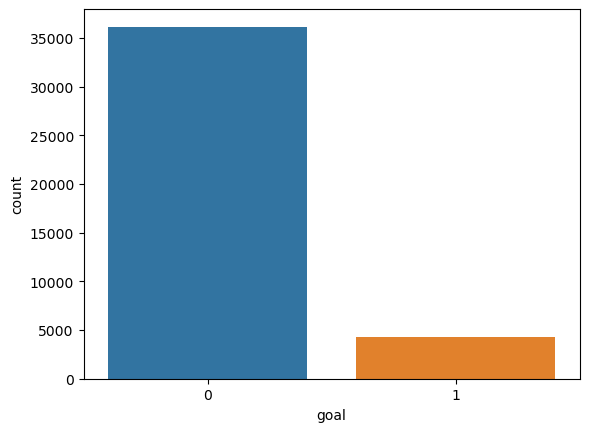

In [91]:
sns.countplot(x='goal', data=merged_data)

Logistic Regression:
Accuracy: 0.8983176645225136
Precision: 0.6875
Recall: 0.05200945626477541
F1-score: 0.0967032967032967
ROC AUC: 0.5246231310061097
[[10827    30]
 [ 1203    66]]


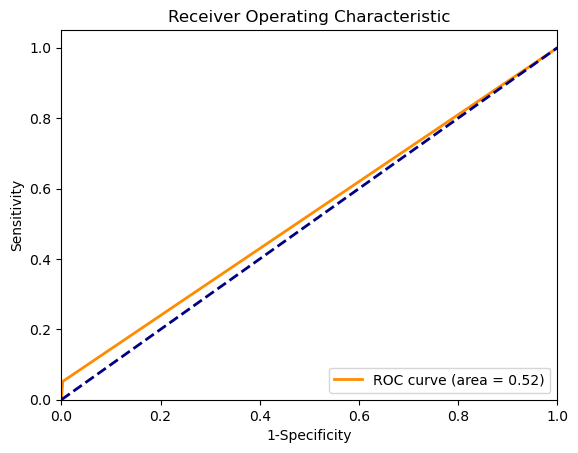

In [92]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

lr_probabilities = logistic_regression.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
cmatrix_lr = confusion_matrix(y_test, y_pred_lr)

# Plot ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
roc_auc_lr_curve = auc(fpr_lr, tpr_lr)


print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1-score: {f1_lr}")
print(f"ROC AUC: {roc_auc_lr}")
print(f"{cmatrix_lr}")


# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [93]:
lr_probabilities

array([0.0699497 , 0.16818131, 0.18356846, ..., 0.04087708, 0.01701821,
       0.08497934])

Decision Tree:
Accuracy: 0.8239320468414976
Precision: 0.21362433862433863
Recall: 0.2545311268715524
F1-score: 0.2322905429701546
ROC AUC: 0.5725082639976258
[[9668 1189]
 [ 946  323]]


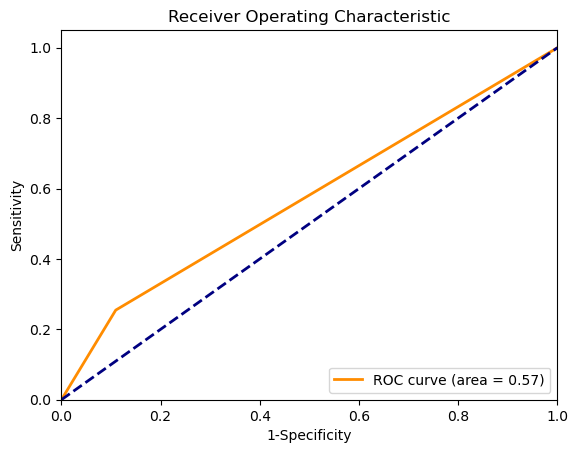

In [94]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
cmatrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
roc_auc_dt_curve = auc(fpr_dt, tpr_dt)

print("Decision Tree:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-score: {f1_dt}")
print(f"ROC AUC: {roc_auc_dt}")
print(f"{cmatrix_dt}")

# Plot ROC curve
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Random Forest:
Accuracy: 0.8973280554181099
Precision: 0.54
Recall: 0.1276595744680851
F1-score: 0.20650095602294455
ROC AUC: 0.5574744404531639
[[10719   138]
 [ 1107   162]]


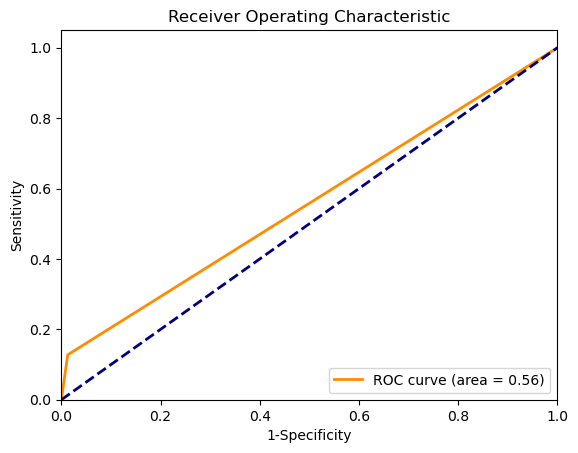

In [95]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
cmatrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf_curve = auc(fpr_rf, tpr_rf)


print("Random Forest:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-score: {f1_rf}")
print(f"ROC AUC: {roc_auc_rf}")
print(f"{cmatrix_rf}")


# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Gradient Boosting Classifier:
Accuracy: 0.9001319478805871
Precision: 0.6218487394957983
Recall: 0.11662726556343578
F1-score: 0.1964167219641672
ROC AUC: 0.5541688414028839
[[10767    90]
 [ 1121   148]]


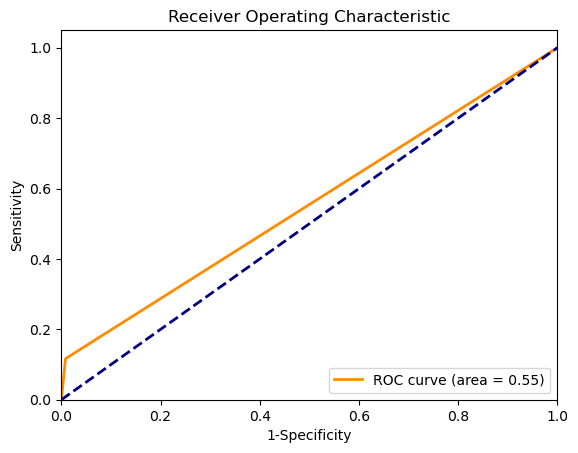

In [96]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

# Evaluation
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm)
roc_auc_gbm = roc_auc_score(y_test, y_pred_gbm)
cmatrix_gbm = confusion_matrix(y_test, y_pred_gbm)

# Plot ROC curve
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, y_pred_gbm)
roc_auc_gbm_curve = auc(fpr_gbm, tpr_gbm)

print("Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gbm}")
print(f"Precision: {precision_gbm}")
print(f"Recall: {recall_gbm}")
print(f"F1-score: {f1_gbm}")
print(f"ROC AUC: {roc_auc_gbm}")
print(f"{cmatrix_gbm}")

# Plot ROC curve
plt.figure()
plt.plot(fpr_gbm, tpr_gbm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gbm_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

SVM:
Accuracy: 0.8953488372093024
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC AUC: 0.5
[[10857     0]
 [ 1269     0]]


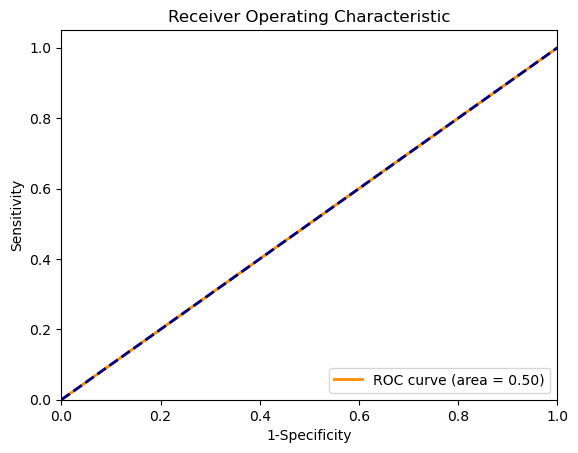

In [97]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
cmatrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
roc_auc_svm_curve = auc(fpr_svm, tpr_svm)

print("SVM:")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1-score: {f1_svm}")
print(f"ROC AUC: {roc_auc_svm}")
print(f"{cmatrix_svm}")

# Plot ROC curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Neural Network Classifier:
Accuracy: 0.8859475507174666
Precision: 0.3792372881355932
Recall: 0.14105594956658787
F1-score: 0.20562894887995406
ROC AUC: 0.5570343761833124
[[10564   293]
 [ 1090   179]]


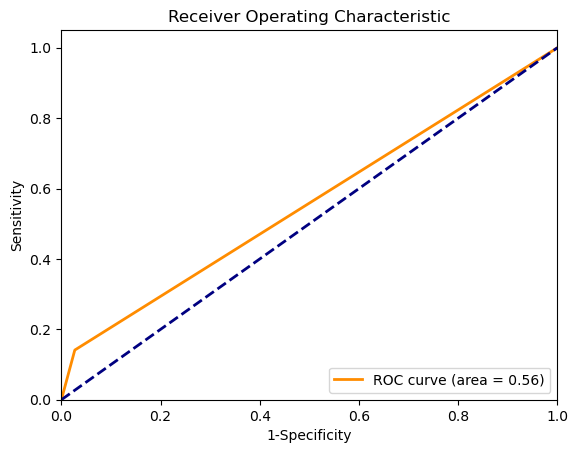

In [98]:
nn_classifier = MLPClassifier()
nn_classifier.fit(X_train, y_train)
y_pred_nn = nn_classifier.predict(X_test)

# Evaluation
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_nn)
cmatrix_nn = confusion_matrix(y_test, y_pred_nn)

# Plot ROC curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_nn)
roc_auc_nn_curve = auc(fpr_nn, tpr_nn)

print("Neural Network Classifier:")
print(f"Accuracy: {accuracy_nn}")
print(f"Precision: {precision_nn}")
print(f"Recall: {recall_nn}")
print(f"F1-score: {f1_nn}")
print(f"ROC AUC: {roc_auc_nn}")
print(f"{cmatrix_nn}")

# Plot ROC curve
plt.figure()
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nn_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

K-Nearest Neighbors:
Accuracy: 0.8889163780306779
Precision: 0.1694915254237288
Recall: 0.015760441292356184
F1-score: 0.02883922134102379
ROC AUC: 0.5033670033670034
[[10759    98]
 [ 1249    20]]


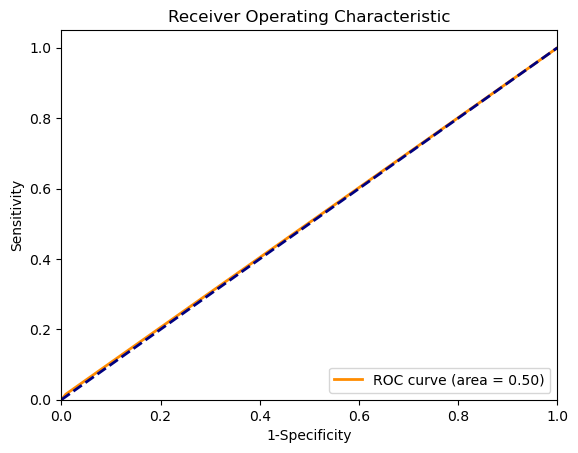

In [99]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
cmatrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
roc_auc_knn_curve = auc(fpr_knn, tpr_knn)

print("K-Nearest Neighbors:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-score: {f1_knn}")
print(f"ROC AUC: {roc_auc_knn}")
print(f"{cmatrix_knn}")

# Plot ROC curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Logistic Regression (Oversampled):
Accuracy: 0.6919016988289626
Precision: 0.2026994456495541
Recall: 0.6627265563435776
F1-score: 0.3104466592838686
ROC AUC: 0.6790191683808706
[[7549 3308]
 [ 428  841]]


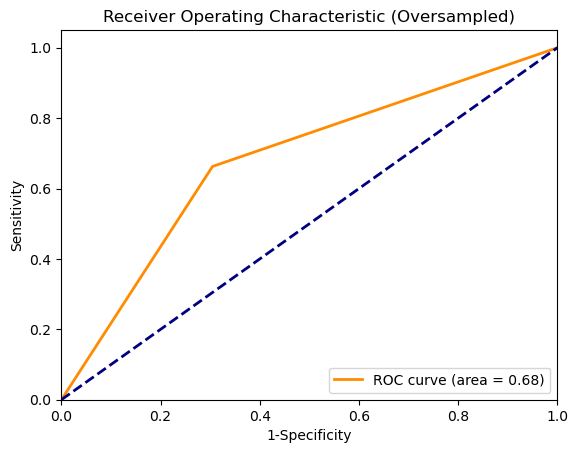

In [100]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

logistic_regression_oversampled = LogisticRegression()
logistic_regression_oversampled.fit(X_train_resampled, y_train_resampled)
y_pred_lr_oversampled = logistic_regression_oversampled.predict(X_test)

# Evaluation
accuracy_lr_oversampled = accuracy_score(y_test, y_pred_lr_oversampled)
precision_lr_oversampled = precision_score(y_test, y_pred_lr_oversampled)
recall_lr_oversampled = recall_score(y_test, y_pred_lr_oversampled)
f1_lr_oversampled = f1_score(y_test, y_pred_lr_oversampled)
roc_auc_lr_oversampled = roc_auc_score(y_test, y_pred_lr_oversampled)
cmatrix_lr_oversampled = confusion_matrix(y_test, y_pred_lr_oversampled)

# Plot ROC curve
fpr_lr_oversampled, tpr_lr_oversampled, thresholds_lr_oversampled = roc_curve(y_test, y_pred_lr_oversampled)
roc_auc_lr_curve_oversampled = auc(fpr_lr_oversampled, tpr_lr_oversampled)


print("Logistic Regression (Oversampled):")
print(f"Accuracy: {accuracy_lr_oversampled}")
print(f"Precision: {precision_lr_oversampled}")
print(f"Recall: {recall_lr_oversampled}")
print(f"F1-score: {f1_lr_oversampled}")
print(f"ROC AUC: {roc_auc_lr_oversampled}")
print(f"{cmatrix_lr_oversampled}")


# Plot ROC curve
plt.figure()
plt.plot(fpr_lr_oversampled, tpr_lr_oversampled, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr_curve_oversampled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (Oversampled)')
plt.legend(loc="lower right")
plt.show()

Decision Tree (Oversampled):
Accuracy: 0.768678871845621
Precision: 0.17676767676767677
Recall: 0.3309692671394799
F1-score: 0.23045267489711935
ROC AUC: 0.5754045009364158
[[8901 1956]
 [ 849  420]]


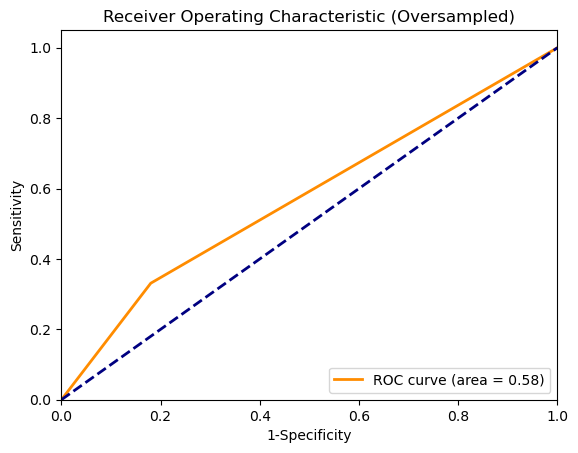

In [101]:
decision_tree_oversampled = DecisionTreeClassifier()
decision_tree_oversampled.fit(X_train_resampled, y_train_resampled)
y_pred_dt_oversampled = decision_tree_oversampled.predict(X_test)

# Evaluation
accuracy_dt_oversampled = accuracy_score(y_test, y_pred_dt_oversampled)
precision_dt_oversampled = precision_score(y_test, y_pred_dt_oversampled)
recall_dt_oversampled = recall_score(y_test, y_pred_dt_oversampled)
f1_dt_oversampled = f1_score(y_test, y_pred_dt_oversampled)
roc_auc_dt_oversampled = roc_auc_score(y_test, y_pred_dt_oversampled)
cmatrix_dt_oversampled = confusion_matrix(y_test, y_pred_dt_oversampled)

# Plot ROC curve
fpr_dt_oversampled, tpr_dt_oversampled, thresholds_dt_oversampled = roc_curve(y_test, y_pred_dt_oversampled)
roc_auc_dt_curve_oversampled = auc(fpr_dt_oversampled, tpr_dt_oversampled)


print("Decision Tree (Oversampled):")
print(f"Accuracy: {accuracy_dt_oversampled}")
print(f"Precision: {precision_dt_oversampled}")
print(f"Recall: {recall_dt_oversampled}")
print(f"F1-score: {f1_dt_oversampled}")
print(f"ROC AUC: {roc_auc_dt_oversampled}")
print(f"{cmatrix_dt_oversampled}")


# Plot ROC curve
plt.figure()
plt.plot(fpr_dt_oversampled, tpr_dt_oversampled, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt_curve_oversampled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (Oversampled)')
plt.legend(loc="lower right")
plt.show()

Random Forest (Oversampled):
Accuracy: 0.8234372422892957
Precision: 0.248558246828143
Recall: 0.3396375098502758
F1-score: 0.28704628704628704
ROC AUC: 0.6098113864071311
[[9554 1303]
 [ 838  431]]


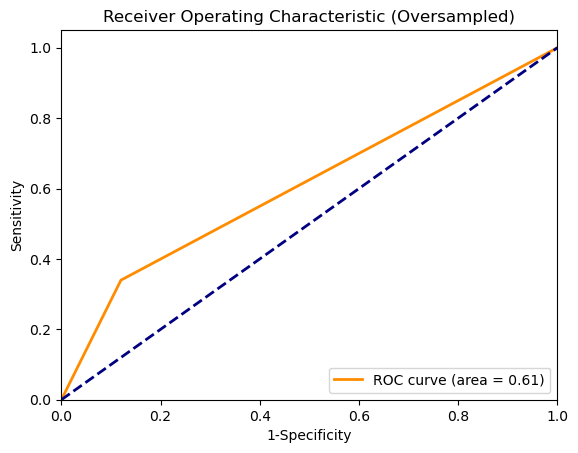

In [102]:
random_forest_oversampled = RandomForestClassifier()
random_forest_oversampled.fit(X_train_resampled, y_train_resampled)
y_pred_rf_oversampled = random_forest_oversampled.predict(X_test)

rf_oversampled_probabilities = random_forest_oversampled.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_rf_oversampled = accuracy_score(y_test, y_pred_rf_oversampled)
precision_rf_oversampled = precision_score(y_test, y_pred_rf_oversampled)
recall_rf_oversampled = recall_score(y_test, y_pred_rf_oversampled)
f1_rf_oversampled = f1_score(y_test, y_pred_rf_oversampled)
roc_auc_rf_oversampled = roc_auc_score(y_test, y_pred_rf_oversampled)
cmatrix_rf_oversampled = confusion_matrix(y_test, y_pred_rf_oversampled)

# Plot ROC curve
fpr_rf_oversampled, tpr_rf_oversampled, thresholds_rf_oversampled = roc_curve(y_test, y_pred_rf_oversampled)
roc_auc_rf_curve_oversampled = auc(fpr_rf_oversampled, tpr_rf_oversampled)


print("Random Forest (Oversampled):")
print(f"Accuracy: {accuracy_rf_oversampled}")
print(f"Precision: {precision_rf_oversampled}")
print(f"Recall: {recall_rf_oversampled}")
print(f"F1-score: {f1_rf_oversampled}")
print(f"ROC AUC: {roc_auc_rf_oversampled}")
print(f"{cmatrix_rf_oversampled}")

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf_oversampled, tpr_rf_oversampled, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf_curve_oversampled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (Oversampled)')
plt.legend(loc="lower right")
plt.show()

Gradient Boosting Classifier (Oversampled):
Accuracy: 0.7506185056902523
Precision: 0.2146341463414634
Recall: 0.5200945626477541
F1-score: 0.30386740331491713
ROC AUC: 0.6488287126584998
[[8442 2415]
 [ 609  660]]


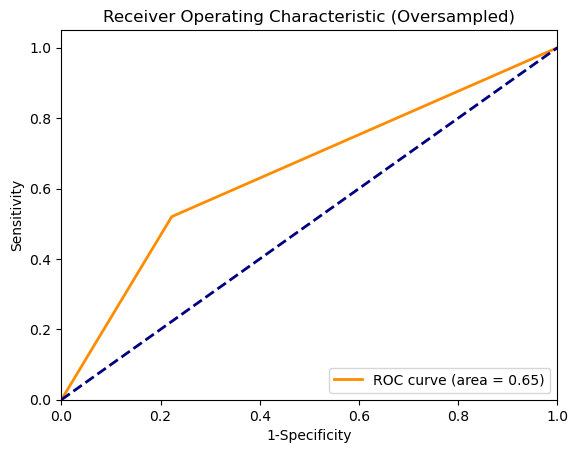

In [103]:
gbm_oversampled = GradientBoostingClassifier()  
gbm_oversampled.fit(X_train_resampled, y_train_resampled)
y_pred_gbm_oversampled = gbm_oversampled.predict(X_test)

# Evaluation
accuracy_gbm_oversampled = accuracy_score(y_test, y_pred_gbm_oversampled)
precision_gbm_oversampled = precision_score(y_test, y_pred_gbm_oversampled)
recall_gbm_oversampled = recall_score(y_test, y_pred_gbm_oversampled)
f1_gbm_oversampled = f1_score(y_test, y_pred_gbm_oversampled)
roc_auc_gbm_oversampled = roc_auc_score(y_test, y_pred_gbm_oversampled)
cmatrix_gbm_oversampled = confusion_matrix(y_test, y_pred_gbm_oversampled)

# Plot ROC curve
fpr_gbm_oversampled, tpr_gbm_oversampled, thresholds_gbm_oversampled = roc_curve(y_test, y_pred_gbm_oversampled)
roc_auc_gbm_curve_oversampled = auc(fpr_gbm_oversampled, tpr_gbm_oversampled)

print("Gradient Boosting Classifier (Oversampled):")
print(f"Accuracy: {accuracy_gbm_oversampled}")
print(f"Precision: {precision_gbm_oversampled}")
print(f"Recall: {recall_gbm_oversampled}")
print(f"F1-score: {f1_gbm_oversampled}")
print(f"ROC AUC: {roc_auc_gbm_oversampled}")
print(f"{cmatrix_gbm_oversampled}")

# Plot ROC curve
plt.figure()
plt.plot(fpr_gbm_oversampled, tpr_gbm_oversampled, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gbm_curve_oversampled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (Oversampled)')
plt.legend(loc="lower right")
plt.show()

SVM (Oversampled):
Accuracy: 0.3046346693056243
Precision: 0.10482180293501048
Recall: 0.7486209613869188
F1-score: 0.18389469608981804
ROC AUC: 0.5006805645103518
[[2744 8113]
 [ 319  950]]


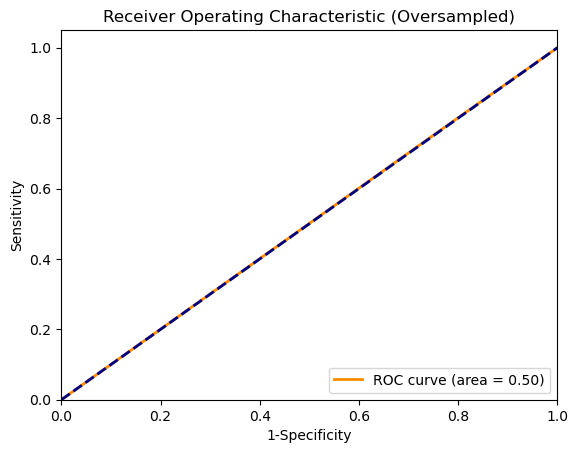

In [104]:
svm_oversampled = SVC()
svm_oversampled.fit(X_train_resampled, y_train_resampled)
y_pred_svm_oversampled = svm_oversampled.predict(X_test)

# Evaluation
accuracy_svm_oversampled = accuracy_score(y_test, y_pred_svm_oversampled)
precision_svm_oversampled = precision_score(y_test, y_pred_svm_oversampled)
recall_svm_oversampled = recall_score(y_test, y_pred_svm_oversampled)
f1_svm_oversampled = f1_score(y_test, y_pred_svm_oversampled)
roc_auc_svm_oversampled = roc_auc_score(y_test, y_pred_svm_oversampled)
cmatrix_svm_oversampled = confusion_matrix(y_test, y_pred_svm_oversampled)

# Plot ROC curve
fpr_svm_oversampled, tpr_svm_oversampled, thresholds_svm_oversampled = roc_curve(y_test, y_pred_svm_oversampled)
roc_auc_svm_curve_oversampled = auc(fpr_svm_oversampled, tpr_svm_oversampled)


print("SVM (Oversampled):")
print(f"Accuracy: {accuracy_svm_oversampled}")
print(f"Precision: {precision_svm_oversampled}")
print(f"Recall: {recall_svm_oversampled}")
print(f"F1-score: {f1_svm_oversampled}")
print(f"ROC AUC: {roc_auc_svm_oversampled}")
print(f"{cmatrix_svm_oversampled}")


# Plot ROC curve
plt.figure()
plt.plot(fpr_svm_oversampled, tpr_svm_oversampled, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm_curve_oversampled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (Oversampled)')
plt.legend(loc="lower right")
plt.show()

Neural Network (Oversampled):
Accuracy: 0.7218373742371763
Precision: 0.20316027088036118
Recall: 0.5673758865248227
F1-score: 0.2991896945771868
ROC AUC: 0.653633600442111
[[8033 2824]
 [ 549  720]]


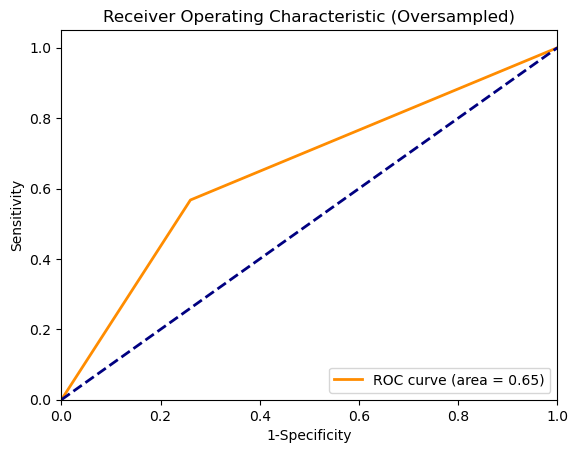

In [105]:
neural_network_oversampled = MLPClassifier()
neural_network_oversampled.fit(X_train_resampled, y_train_resampled)
y_pred_nn_oversampled = neural_network_oversampled.predict(X_test)

# Evaluation
accuracy_nn_oversampled = accuracy_score(y_test, y_pred_nn_oversampled)
precision_nn_oversampled = precision_score(y_test, y_pred_nn_oversampled)
recall_nn_oversampled = recall_score(y_test, y_pred_nn_oversampled)
f1_nn_oversampled = f1_score(y_test, y_pred_nn_oversampled)
roc_auc_nn_oversampled = roc_auc_score(y_test, y_pred_nn_oversampled)
cmatrix_nn_oversampled = confusion_matrix(y_test, y_pred_nn_oversampled)

# Plot ROC curve
fpr_nn_oversampled, tpr_nn_oversampled, thresholds_nn_oversampled = roc_curve(y_test, y_pred_nn_oversampled)
roc_auc_nn_curve_oversampled = auc(fpr_nn_oversampled, tpr_nn_oversampled)


print("Neural Network (Oversampled):")
print(f"Accuracy: {accuracy_nn_oversampled}")
print(f"Precision: {precision_nn_oversampled}")
print(f"Recall: {recall_nn_oversampled}")
print(f"F1-score: {f1_nn_oversampled}")
print(f"ROC AUC: {roc_auc_nn_oversampled}")
print(f"{cmatrix_nn_oversampled}")


# Plot ROC curve
plt.figure()
plt.plot(fpr_nn_oversampled, tpr_nn_oversampled, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nn_curve_oversampled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (Oversampled)')
plt.legend(loc="lower right")
plt.show()

KNN (Oversampled):
Accuracy: 0.6712023750618505
Precision: 0.12458563535911603
Recall: 0.355397951142632
F1-score: 0.18449580691347925
ROC AUC: 0.531756265798819
[[7688 3169]
 [ 818  451]]


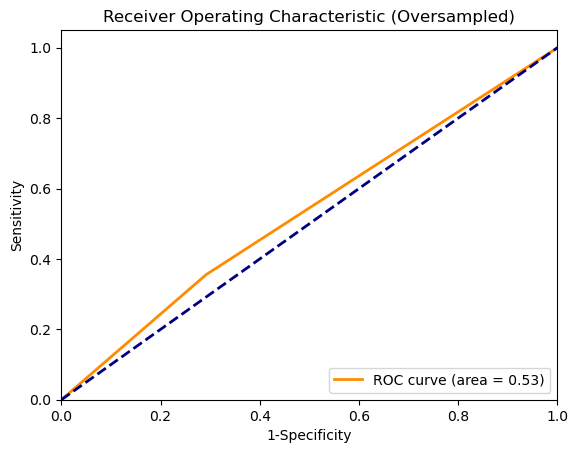

In [106]:
knn_oversampled = KNeighborsClassifier()
knn_oversampled.fit(X_train_resampled, y_train_resampled)
y_pred_knn_oversampled = knn_oversampled.predict(X_test)

# Evaluation
accuracy_knn_oversampled = accuracy_score(y_test, y_pred_knn_oversampled)
precision_knn_oversampled = precision_score(y_test, y_pred_knn_oversampled)
recall_knn_oversampled = recall_score(y_test, y_pred_knn_oversampled)
f1_knn_oversampled = f1_score(y_test, y_pred_knn_oversampled)
roc_auc_knn_oversampled = roc_auc_score(y_test, y_pred_knn_oversampled)
cmatrix_knn_oversampled = confusion_matrix(y_test, y_pred_knn_oversampled)

# Plot ROC curve
fpr_knn_oversampled, tpr_knn_oversampled, thresholds_knn_oversampled = roc_curve(y_test, y_pred_knn_oversampled)
roc_auc_knn_curve_oversampled = auc(fpr_knn_oversampled, tpr_knn_oversampled)


print("KNN (Oversampled):")
print(f"Accuracy: {accuracy_knn_oversampled}")
print(f"Precision: {precision_knn_oversampled}")
print(f"Recall: {recall_knn_oversampled}")
print(f"F1-score: {f1_knn_oversampled}")
print(f"ROC AUC: {roc_auc_knn_oversampled}")
print(f"{cmatrix_knn_oversampled}")


# Plot ROC curve
plt.figure()
plt.plot(fpr_knn_oversampled, tpr_knn_oversampled, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn_curve_oversampled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (Oversampled)')
plt.legend(loc="lower right")
plt.show()

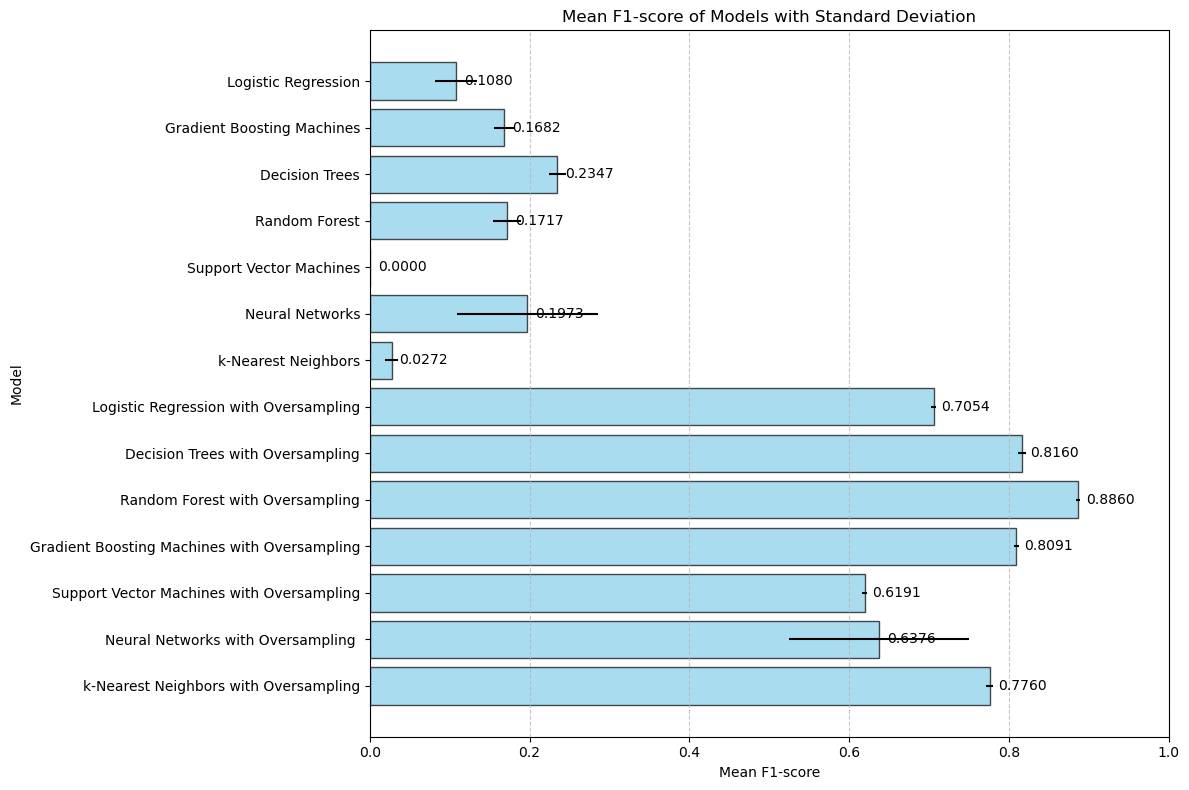

In [107]:
import matplotlib.pyplot as plt

# Models and their mean F1-scores and standard deviations
models_f1_scores = {
    "Logistic Regression": (0.108, 0.026),
    "Gradient Boosting Machines": (0.1682, 0.0125),
    "Decision Trees": (0.2347, 0.0107),
    "Random Forest": (0.1717, 0.0176),
    "Support Vector Machines": (0.0, 0.0),
    "Neural Networks": (0.1973, 0.088),
    "k-Nearest Neighbors": (0.0272, 0.0085),
    "Logistic Regression with Oversampling": (0.7054, 0.003),
    "Decision Trees with Oversampling": (0.816, 0.0047),
    "Random Forest with Oversampling": (0.886, 0.0025),
    "Gradient Boosting Machines with Oversampling": (0.8091, 0.0028),
    "Support Vector Machines with Oversampling": (0.6191, 0.0027),
    "Neural Networks with Oversampling ": (0.6376, 0.1126),
    "k-Nearest Neighbors with Oversampling": (0.776, 0.0044)
}

# Extract model names, mean F1-scores, and standard deviations
model_names = list(models_f1_scores.keys())
mean_f1_scores = [score[0] for score in models_f1_scores.values()]
std_f1_scores = [score[1] for score in models_f1_scores.values()]

# Create bar plot
plt.figure(figsize=(12, 8))
plt.barh(model_names, mean_f1_scores, xerr=std_f1_scores, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Mean F1-score')
plt.ylabel('Model')
plt.title('Mean F1-score of Models with Standard Deviation')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest F1-score at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add text labels for each bar
for i in range(len(model_names)):
    plt.text(mean_f1_scores[i] + 0.01, i, f'{mean_f1_scores[i]:.4f}', va='center')

plt.tight_layout()
plt.show()


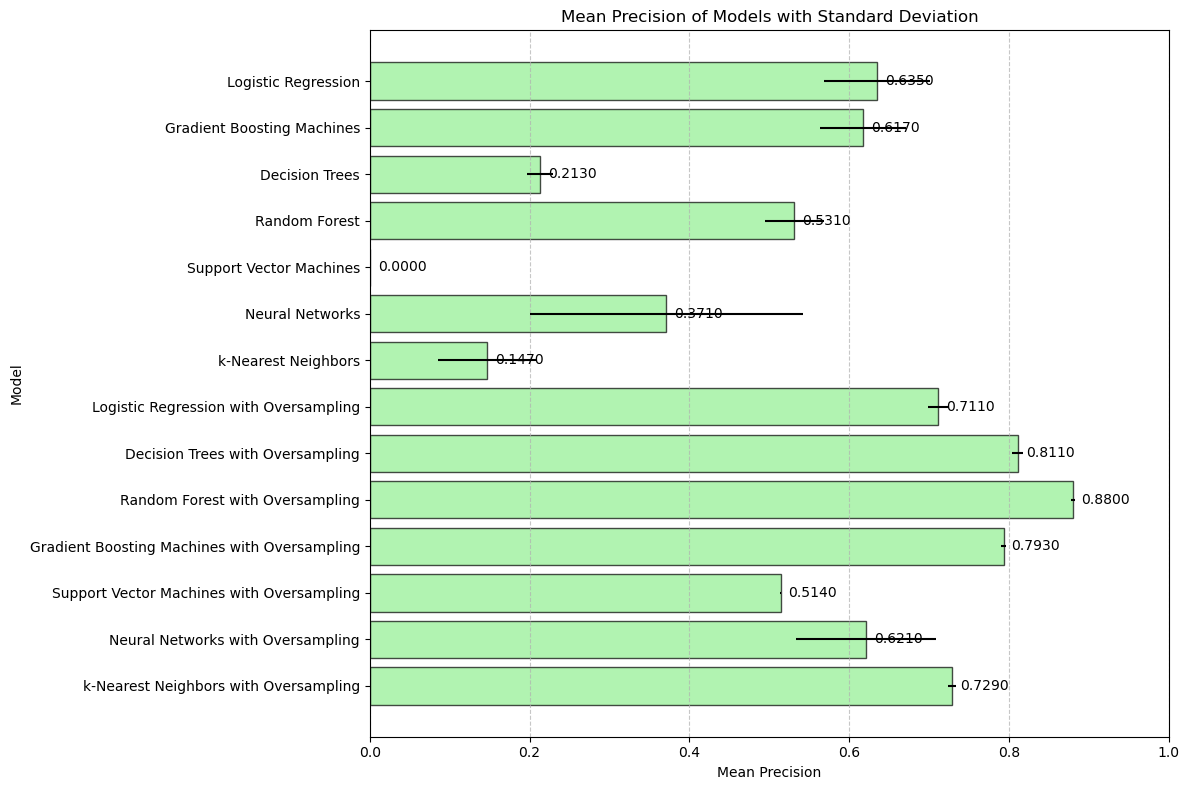

In [108]:
import matplotlib.pyplot as plt

# Models and their mean precision scores and standard deviations
models_precision = {
    "Logistic Regression": (0.635, 0.0665),
    "Gradient Boosting Machines": (0.617, 0.054),
    "Decision Trees": (0.213, 0.016),
    "Random Forest": (0.531, 0.037),
    "Support Vector Machines": (0.0, 0.0),
    "Neural Networks": (0.371, 0.171),
    "k-Nearest Neighbors": (0.147, 0.062),
    "Logistic Regression with Oversampling": (0.711, 0.013),
    "Decision Trees with Oversampling": (0.811, 0.007),
    "Random Forest with Oversampling": (0.880, 0.002),
    "Gradient Boosting Machines with Oversampling": (0.793, 0.003),
    "Support Vector Machines with Oversampling": (0.514, 0.001),
    "Neural Networks with Oversampling": (0.621, 0.088),
    "k-Nearest Neighbors with Oversampling": (0.729, 0.005)
}

# Extract model names, mean precision scores, and standard deviations
model_names = list(models_precision.keys())
mean_precision_scores = [score[0] for score in models_precision.values()]
std_precision_scores = [score[1] for score in models_precision.values()]

# Create bar plot
plt.figure(figsize=(12, 8))
plt.barh(model_names, mean_precision_scores, xerr=std_precision_scores, color='lightgreen', edgecolor='black', alpha=0.7)
plt.xlabel('Mean Precision')
plt.ylabel('Model')
plt.title('Mean Precision of Models with Standard Deviation')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest precision at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add text labels for each bar
for i in range(len(model_names)):
    plt.text(mean_precision_scores[i] + 0.01, i, f'{mean_precision_scores[i]:.4f}', va='center')

plt.tight_layout()
plt.show()


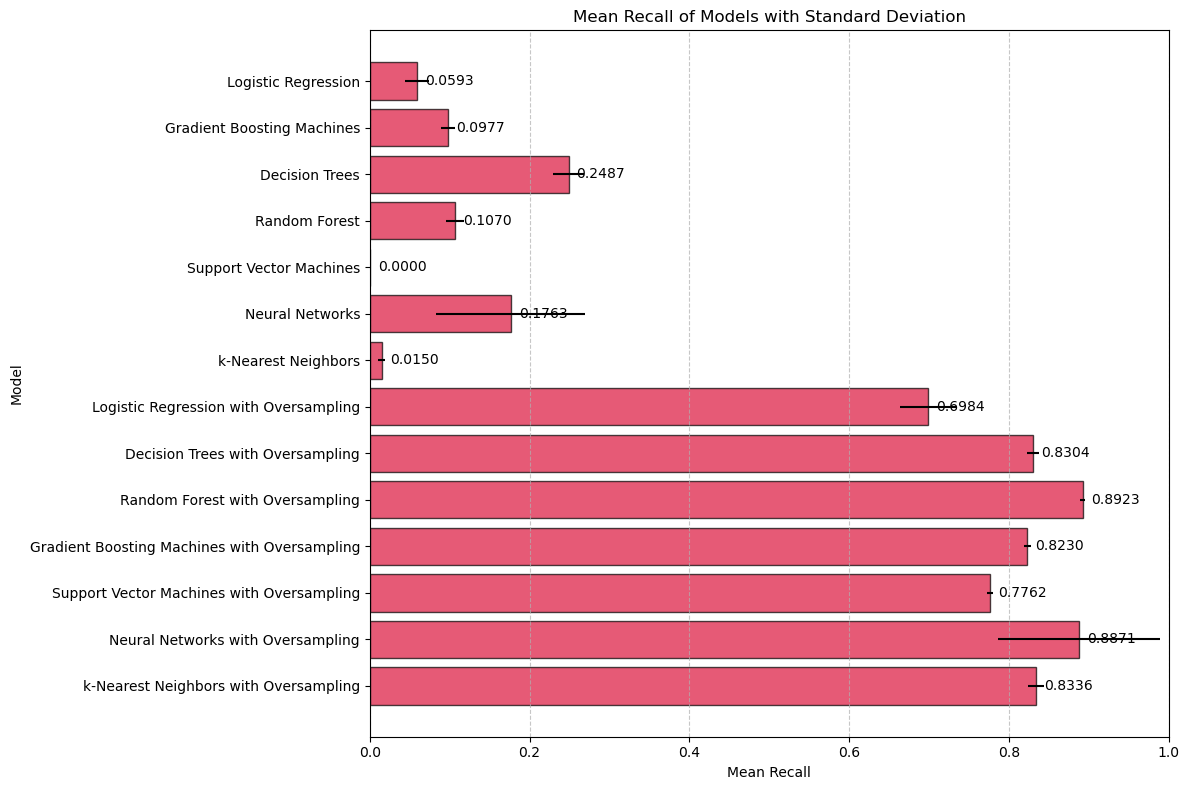

In [109]:
import matplotlib.pyplot as plt

# Models and their mean recall scores and standard deviations
models_recall = {
    "Logistic Regression": (0.0593, 0.0151),
    "Gradient Boosting Machines": (0.0977, 0.0090),
    "Decision Trees": (0.2487, 0.0197),
    "Random Forest": (0.1070, 0.0113),
    "Support Vector Machines": (0.0, 0.0),
    "Neural Networks": (0.1763, 0.0934),
    "k-Nearest Neighbors": (0.0150, 0.0046),
    "Logistic Regression with Oversampling": (0.6984, 0.0355),
    "Decision Trees with Oversampling": (0.8304, 0.0075),
    "Random Forest with Oversampling": (0.8923, 0.0032),
    "Gradient Boosting Machines with Oversampling": (0.8230, 0.0049),
    "Support Vector Machines with Oversampling": (0.7762, 0.0042),
    "Neural Networks with Oversampling": (0.8871, 0.1015),
    "k-Nearest Neighbors with Oversampling": (0.8336, 0.0095)
}

# Extract model names, mean recall scores, and standard deviations
model_names = list(models_recall.keys())
mean_recall_scores = [score[0] for score in models_recall.values()]
std_recall_scores = [score[1] for score in models_recall.values()]

# Create bar plot
plt.figure(figsize=(12, 8))
plt.barh(model_names, mean_recall_scores, xerr=std_recall_scores, color='crimson', edgecolor='black', alpha=0.7)
plt.xlabel('Mean Recall')
plt.ylabel('Model')
plt.title('Mean Recall of Models with Standard Deviation')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest recall at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add text labels for each bar
for i in range(len(model_names)):
    plt.text(mean_recall_scores[i] + 0.01, i, f'{mean_recall_scores[i]:.4f}', va='center')

plt.tight_layout()
plt.show()


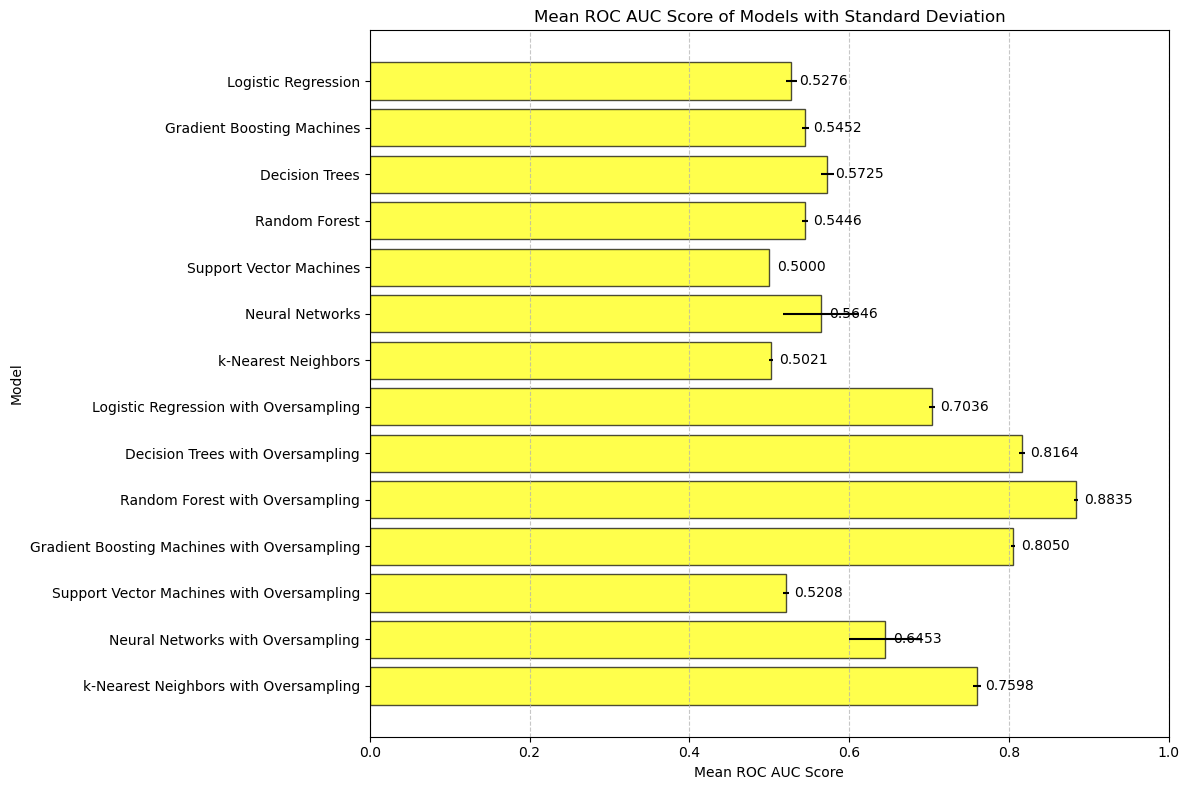

In [110]:
import matplotlib.pyplot as plt

# Models and their mean ROC AUC scores and standard deviations
models_roc_auc = {
    "Logistic Regression": (0.5276, 0.007),
    "Gradient Boosting Machines": (0.5452, 0.0038),
    "Decision Trees": (0.5725, 0.0082),
    "Random Forest": (0.5446, 0.0039),
    "Support Vector Machines": (0.5, 0.0),
    "Neural Networks": (0.5646, 0.0479),
    "k-Nearest Neighbors": (0.5021, 0.0030),
    "Logistic Regression with Oversampling": (0.7036, 0.0038),
    "Decision Trees with Oversampling": (0.8164, 0.0040),
    "Random Forest with Oversampling": (0.8835, 0.0022),
    "Gradient Boosting Machines with Oversampling": (0.8050, 0.0022),
    "Support Vector Machines with Oversampling": (0.5208, 0.0042),
    "Neural Networks with Oversampling": (0.6453, 0.0454),
    "k-Nearest Neighbors with Oversampling": (0.7598, 0.0048)
}

# Extract model names, mean ROC AUC scores, and standard deviations
model_names = list(models_roc_auc.keys())
mean_roc_auc_scores = [score[0] for score in models_roc_auc.values()]
std_roc_auc_scores = [score[1] for score in models_roc_auc.values()]

# Create bar plot
plt.figure(figsize=(12, 8))
plt.barh(model_names, mean_roc_auc_scores, xerr=std_roc_auc_scores, color='yellow', edgecolor='black', alpha=0.7)
plt.xlabel('Mean ROC AUC Score')
plt.ylabel('Model')
plt.title('Mean ROC AUC Score of Models with Standard Deviation')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest ROC AUC score at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add text labels for each bar
for i in range(len(model_names)):
    plt.text(mean_roc_auc_scores[i] + 0.01, i, f'{mean_roc_auc_scores[i]:.4f}', va='center')

plt.tight_layout()
plt.show()


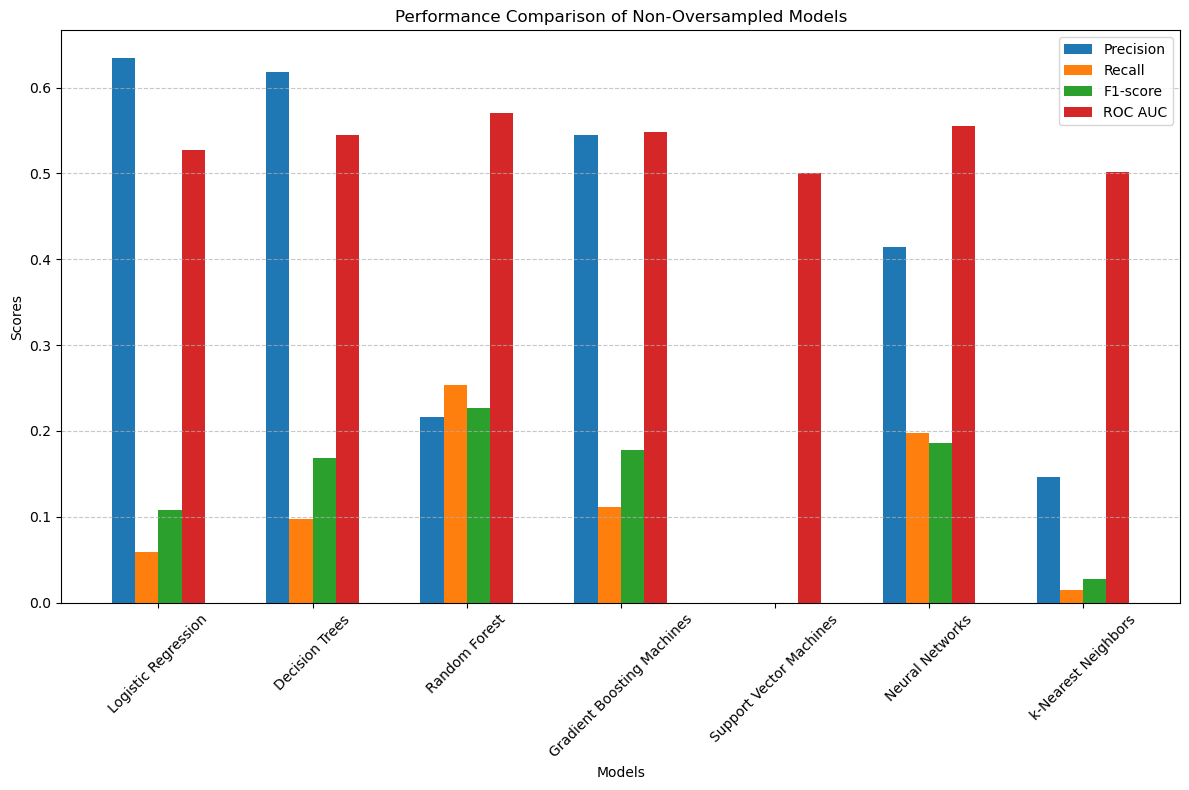

In [111]:
import matplotlib.pyplot as plt

# Define the models
models = [
    "Logistic Regression",  "Decision Trees", "Random Forest", "Gradient Boosting Machines",
    "Support Vector Machines", "Neural Networks", "k-Nearest Neighbors"
]

# Define the metrics and their scores for each model
metrics = {
    "Precision": [0.6349701217648668, 0.6186046057122003, 0.21680664842244587, 0.5453335712601973, 0.0, 0.4142862813094503, 0.14696090973702916],
    "Recall": [0.059333333333333335, 0.09766666666666667, 0.2533333333333333, 0.11133333333333333, 0.0, 0.19766666666666668, 0.015000000000000003],
    "F1-score": [0.10799893277816815, 0.16822616561609569, 0.22644879635349388, 0.17754638445812035, 0.0, 0.1859316949999553, 0.027172257736222026],
    "ROC AUC": [0.5276108501727852, 0.5451368412245194, 0.5703365248548738, 0.548603465582989, 0.5, 0.5548772352980578, 0.5020836831985966]
}

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define the width of each bar
bar_width = 0.15

# Define the positions of the bars on the x-axis
positions = list(range(len(models)))

# Plot each metric as a grouped bar chart
for i, (metric, scores) in enumerate(metrics.items()):
    x = [pos + i * bar_width for pos in positions]
    ax.bar(x, scores, width=bar_width, label=metric)

# Set the labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Non-Oversampled Models')
ax.set_xticks([pos + 1.5 * bar_width for pos in positions])
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


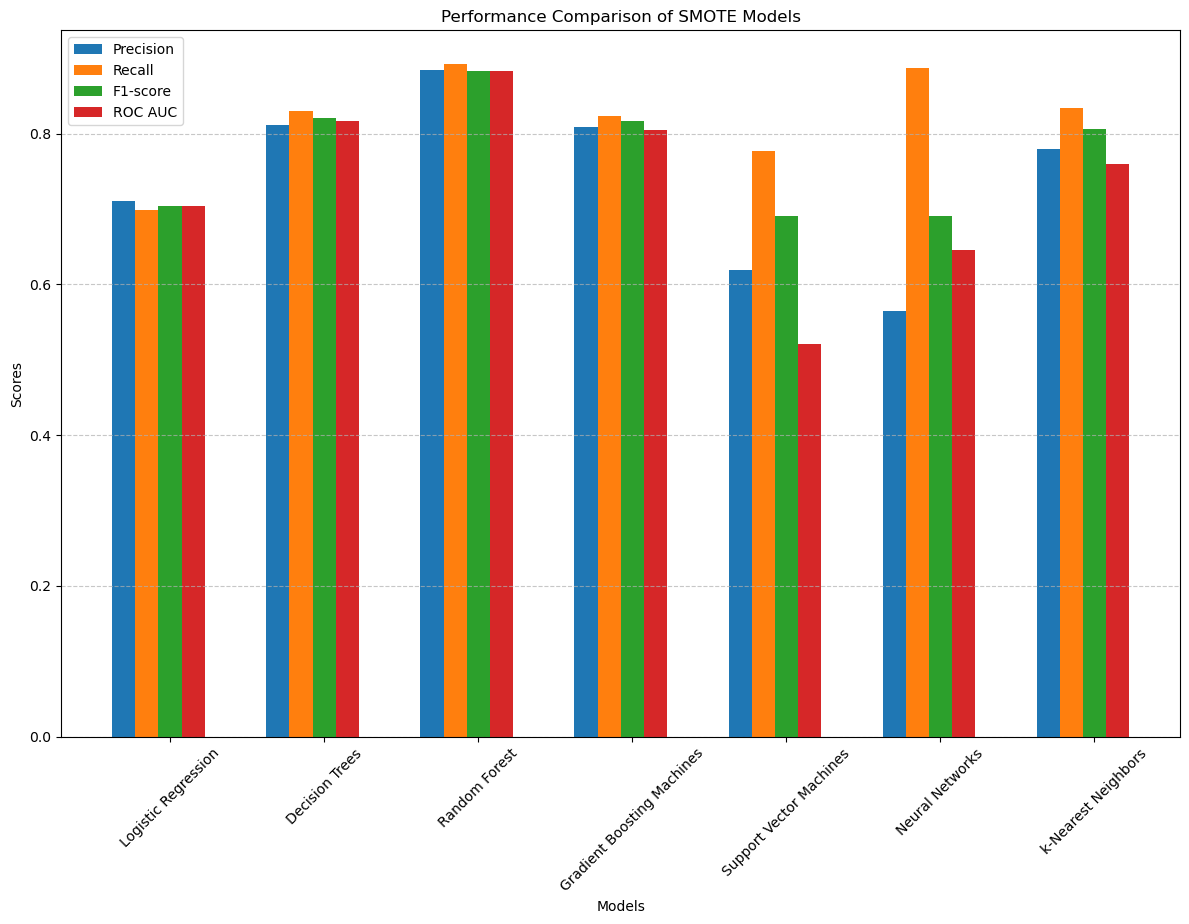

In [112]:
import matplotlib.pyplot as plt

# Define the models
models = [
    "Logistic Regression",
    "Decision Trees",
    "Random Forest",
    "Gradient Boosting Machines",
    "Support Vector Machines",
    "Neural Networks",
    "k-Nearest Neighbors"
]

# Define the metrics and their scores for each model
metrics = {
    "Precision": [0.7106, 0.8112, 0.8841, 0.8091, 0.6191, 0.5647, 0.7799],
    "Recall": [0.6984, 0.8304, 0.8923, 0.8230, 0.7762, 0.8871, 0.8336],
    "F1-score": [0.7045, 0.8207, 0.8830, 0.8160, 0.6900, 0.6904, 0.8063],
    "ROC AUC": [0.7036, 0.8164, 0.8835, 0.8050, 0.5208, 0.6453, 0.7598]
}

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define the width of each bar
bar_width = 0.15

# Define the positions of the bars on the x-axis
positions = list(range(len(models)))

# Plot each metric as a grouped bar chart
for i, (metric, scores) in enumerate(metrics.items()):
    x = [pos + i * bar_width for pos in positions]
    ax.bar(x, scores, width=bar_width, label=metric)

# Set the labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of SMOTE Models')
ax.set_xticks([pos + 2 * bar_width for pos in positions])
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [113]:
rf_oversampled_probabilities

array([0.11, 0.32, 0.37, ..., 0.04, 0.04, 0.07])

In [114]:
np.array(merged_data['goal']).reshape(-1, 1)

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [115]:
xCols = ['playerId', 'teamId', 'matchPeriod', 'eventSec', 'foot', 'height', 'weight', 'role.name', 'shot_foot', 'shotDist', 'shotAngle']

In [116]:
goal_predictions = random_forest_oversampled.predict(np.array(merged_data[xCols]))

In [117]:
goal_predProbs = random_forest_oversampled.predict_proba(merged_data[xCols])[:, 1]

In [118]:
merged_data["xG"] = goal_predProbs

In [163]:
merged_data.head()

playerId  matchId  teamId  matchPeriod    eventSec         id  startY  \
0     25413  2499719    1609            0   94.595788  177959212      41   
1     26150  2499719    1631            0  179.854785  177959247      52   
2     14763  2499719    1631            0  254.745027  177959280      52   
3      7868  2499719    1609            0  425.824035  177959289      33   
4      7868  2499719    1609            0  815.462015  177959429      30   

   startX  goal  firstName  ... foot  height  weight  role.name  shot_foot  \
0      88     1  Alexandre  ...    3   175.0    73.0          1          1   
1      85     0      Riyad  ...    2   179.0    62.0          3          1   
2      96     1     Shinji  ...    3   174.0    70.0          1          0   
3      81     0       Alex  ...    3   175.0    70.0          3          2   
4      75     0       Alex  ...    3   175.0    70.0          3          1   

    shotDist  shotAngle    xG      xG_2      xG_3  
0  15.000000  24.670745  0.79  0.517237  0.697543  
1  15.132746  29.396053  0.23  0.544904  0.578818  
2   4.472136  82.874984  0.96  0.909560  0.786858  
3  25.495098  13.482061  0.04  0.220940  0.103628  
4  32.015621  11.211618  0.04  0.123130  0.125926  

[5 rows x 21 columns]

Team 1 Goals:
Minute: 1, Scorer: Alexandre Lacazette, Shot Type: 1, Shot Distance: 15.0, Shot Angle: 24.67, xG: 0.79
Minute: 46, Scorer: Daniel Nii Tackie Mensah Welbeck, Shot Type: 1, Shot Distance: 8.0, Shot Angle: 53.13, xG: 0.81
Minute: 37, Scorer: Aaron Ramsey, Shot Type: 1, Shot Distance: 14.32, Shot Angle: 14.25, xG: 0.94
Minute: 39, Scorer: Olivier Giroud, Shot Type: 0, Shot Distance: 10.82, Shot Angle: 35.48, xG: 0.79

Team 2 Goals:
Minute: 4, Scorer: Shinji Okazaki, Shot Type: 0, Shot Distance: 4.47, Shot Angle: 82.87, xG: 0.96
Minute: 28, Scorer: Jamie Vardy, Shot Type: 1, Shot Distance: 7.21, Shot Angle: 53.13, xG: 0.95
Minute: 10, Scorer: Jamie Vardy, Shot Type: 0, Shot Distance: 8.94, Shot Angle: 45.0, xG: 0.9


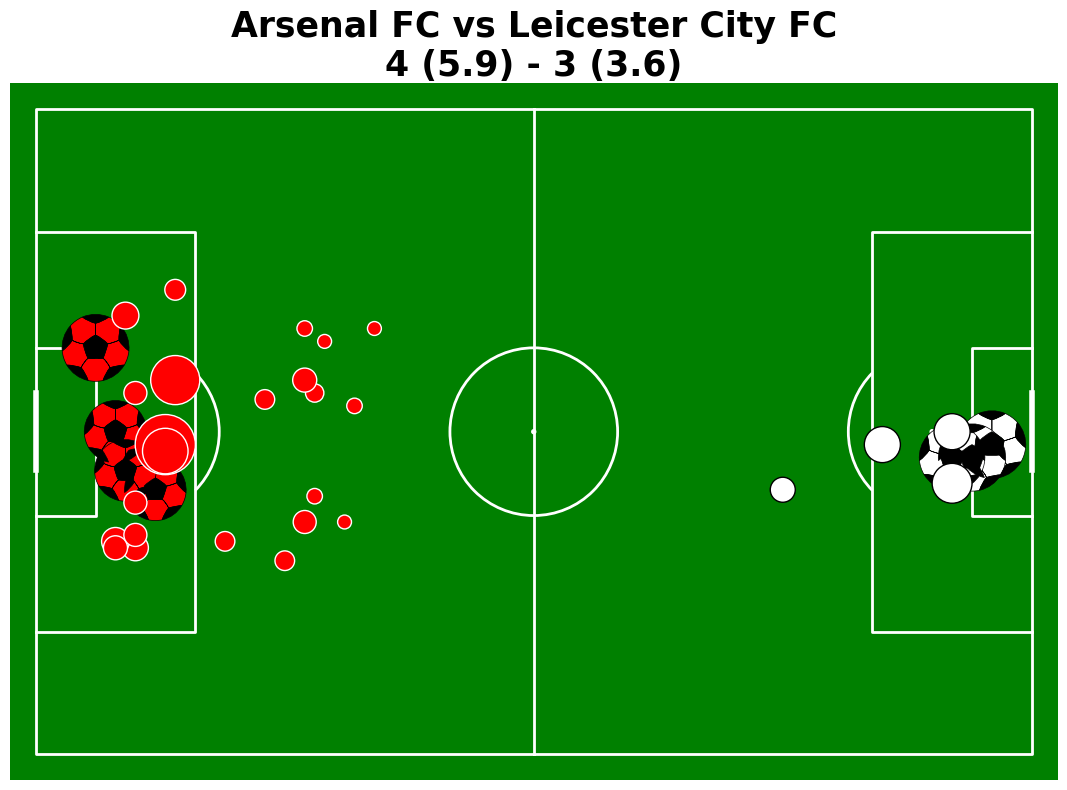

In [120]:
pitch = mplsoccer.Pitch(pitch_type="wyscout",
                       pitch_color="green",
                       line_color="#ffffff")
fig, ax = pitch.draw(figsize=(14, 8))
match_data = merged_data[merged_data["matchId"] == 2499719]
team1_data = match_data[match_data["teamId"] == 1609]
team2_data = match_data[match_data["teamId"] == 1631]

gteam1_data = team1_data[team1_data["goal"] == 1]
gteam2_data = team2_data[team2_data["goal"] == 1]

ngteam1_data = team1_data[team1_data["goal"] != 1]
ngteam2_data = team2_data[team2_data["goal"] != 1]

scatter = pitch.scatter(100-gteam1_data["startX"], 100-gteam1_data["startY"],
                        s=(gteam1_data["xG"] * 2500) + 100,
                        c="red",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(100-ngteam1_data["startX"], 100-ngteam1_data["startY"],
                        s=(ngteam1_data["xG"] * 2500) + 100,
                        c="red",
                        edgecolors='#ffffff',  # give the markers a white border
                        marker="o",
                        ax=ax)

scatter = pitch.scatter(gteam2_data["startX"], gteam2_data["startY"],
                        s=(gteam2_data["xG"] * 2500) + 100,
                        c="white",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(ngteam2_data["startX"], ngteam2_data["startY"],
                        s=(ngteam2_data["xG"] * 2500) + 100,
                        c="white",
                        edgecolors='#000000',  # give the markers a white border
                        marker="o",
                        ax=ax)

xg1 = team1_data["xG"].sum().round(1)
xg2 = team2_data["xG"].sum().round(1)

ax.set_title("Arsenal FC vs Leicester City FC"
             + "\n4 (" + str(xg1) + ") - 3 (" + str(xg2) + ")",
             loc="center",
             color="#000000",
             pad=-80,
             fontsize=25,
             weight="bold")

# Import the codecs module
import codecs

# Function to remove escape sequences
def remove_escape_sequences(text):
    return codecs.decode(text, 'unicode_escape')

# Print details of goal-scoring events for team 1
print("Team 1 Goals:")
for index, row in gteam1_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")

# Print details of goal-scoring events for team 2
print("\nTeam 2 Goals:")
for index, row in gteam2_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")


Team 1 Goals:

Team 2 Goals:
Minute: 4, Scorer: Aaron Mooy, Shot Type: 1, Shot Distance: 18.87, Shot Angle: 20.63, xG: 0.14


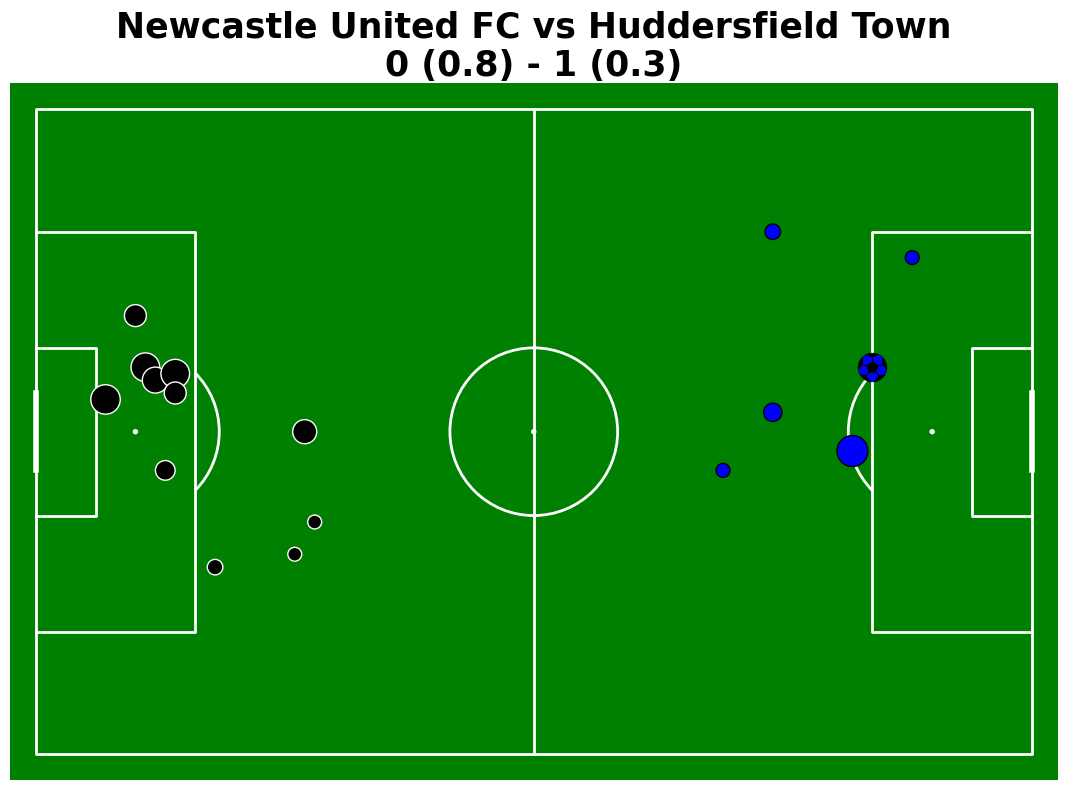

In [121]:
pitch = mplsoccer.Pitch(pitch_type="wyscout",
                       pitch_color="green",
                       line_color="#ffffff")
fig, ax = pitch.draw(figsize=(14, 8))
match_data = merged_data[merged_data["matchId"] == 2499731]
teamIds = match_data["teamId"].unique().tolist()
team1_data = match_data[match_data["teamId"] == teamIds[0]]
team2_data = match_data[match_data["teamId"] == teamIds[1]]

gteam1_data = team1_data[team1_data["goal"] == 1]
gteam2_data = team2_data[team2_data["goal"] == 1]

ngteam1_data = team1_data[team1_data["goal"] != 1]
ngteam2_data = team2_data[team2_data["goal"] != 1]

scatter = pitch.scatter(100-gteam1_data["startX"], 100-gteam1_data["startY"],
                        s=(gteam1_data["xG"] * 2500) + 100,
                        c="black",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(100-ngteam1_data["startX"], 100-ngteam1_data["startY"],
                        s=(ngteam1_data["xG"] * 2500) + 100,
                        c="black",
                        edgecolors='#ffffff',  # give the markers a white border
                        marker="o",
                        ax=ax)

scatter = pitch.scatter(gteam2_data["startX"], gteam2_data["startY"],
                        s=(gteam2_data["xG"] * 2500) + 100,
                        c="blue",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(ngteam2_data["startX"], ngteam2_data["startY"],
                        s=(ngteam2_data["xG"] * 2500) + 100,
                        c="blue",
                        edgecolors='#000000',  # give the markers a white border
                        marker="o",
                        ax=ax)

goals1 = team1_data["goal"].sum().round(1)
goals2 = team2_data["goal"].sum().round(1)
xg1 = team1_data["xG"].sum().round(1)
xg2 = team2_data["xG"].sum().round(1)

ax.set_title("Newcastle United FC vs Huddersfield Town"
             + "\n" + str(goals1) + " (" + str(xg1) + ") - " + str(goals2) + " (" + str(xg2) + ")",
             loc="center",
             color="#000000",
             pad=-80,
             fontsize=25,
             weight="bold")

# Import the codecs module
import codecs

# Function to remove escape sequences
def remove_escape_sequences(text):
    return codecs.decode(text, 'unicode_escape')

# Print details of goal-scoring events for team 1
print("Team 1 Goals:")
for index, row in gteam1_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")

# Print details of goal-scoring events for team 2
print("\nTeam 2 Goals:")
for index, row in gteam2_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")

Team 1 Goals:
Minute: 1, Scorer: Jesé Rodríguez Ruiz, Shot Type: 2, Shot Distance: 20.0, Shot Angle: 14.04, xG: 0.72

Team 2 Goals:


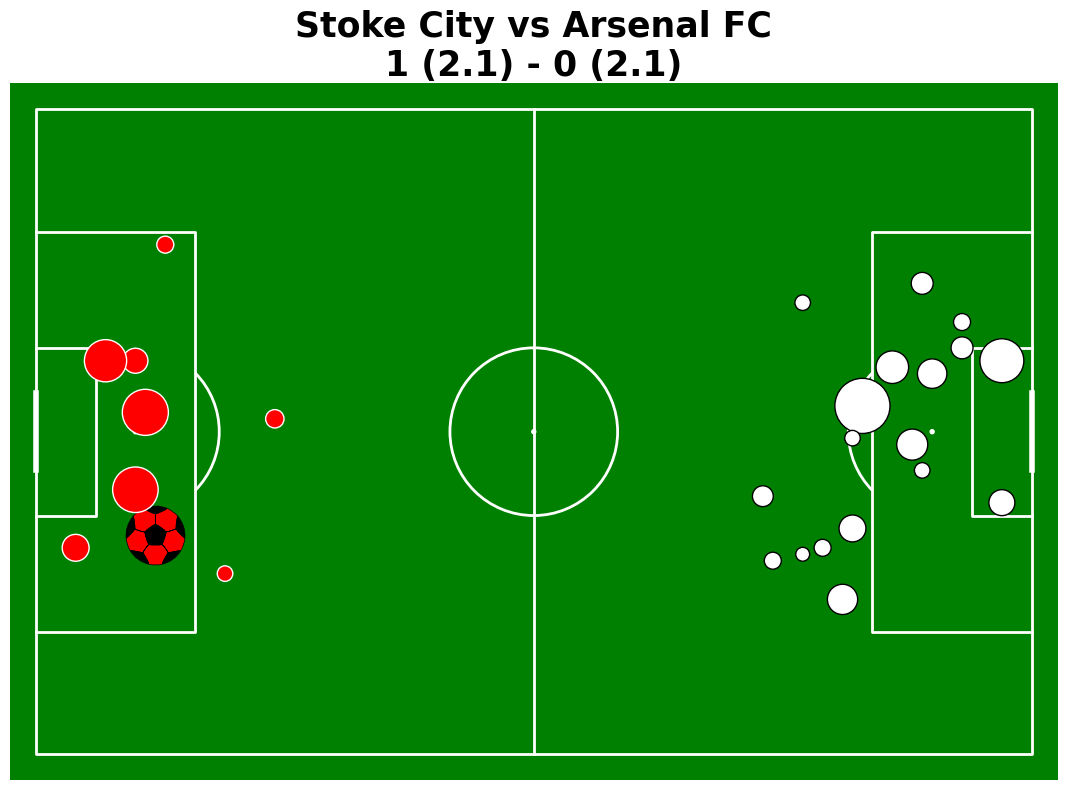

In [122]:
pitch = mplsoccer.Pitch(pitch_type="wyscout",
                       pitch_color="green",
                       line_color="#ffffff")
fig, ax = pitch.draw(figsize=(14, 8))

match_data = merged_data[merged_data["matchId"] == 2499735]

teamIds = match_data["teamId"].unique().tolist()
team1_data = match_data[match_data["teamId"] == teamIds[0]]
team2_data = match_data[match_data["teamId"] == teamIds[1]]

gteam1_data = team1_data[team1_data["goal"] == 1]
gteam2_data = team2_data[team2_data["goal"] == 1]

ngteam1_data = team1_data[team1_data["goal"] != 1]
ngteam2_data = team2_data[team2_data["goal"] != 1]

scatter = pitch.scatter(100-gteam1_data["startX"], 100-gteam1_data["startY"],
                        s=(gteam1_data["xG"] * 2500) + 100,
                        c="red",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(100-ngteam1_data["startX"], 100-ngteam1_data["startY"],
                        s=(ngteam1_data["xG"] * 2500) + 100,
                        c="red",
                        edgecolors='#ffffff',  # give the markers a white border
                        marker="o",
                        ax=ax)

scatter = pitch.scatter(gteam2_data["startX"], gteam2_data["startY"],
                        s=(gteam2_data["xG"] * 2500) + 100,
                        c="white",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(ngteam2_data["startX"], ngteam2_data["startY"],
                        s=(ngteam2_data["xG"] * 2500) + 100,
                        c="white",
                        edgecolors='#000000',  # give the markers a white border
                        marker="o",
                        ax=ax)

goals1 = team1_data["goal"].sum().round(1)
goals2 = team2_data["goal"].sum().round(1)

xg1 = team1_data["xG"].sum().round(1)
xg2 = team2_data["xG"].sum().round(1)

ax.set_title("Stoke City vs Arsenal FC"
             + "\n" + str(goals1) + " (" + str(xg1) + ") - " + str(goals2) + " (" + str(xg2) + ")",
             loc="center",
             color="#000000",
             pad=-80,
             fontsize=25,
             weight="bold")

# Import the codecs module
import codecs

# Function to remove escape sequences
def remove_escape_sequences(text):
    return codecs.decode(text, 'unicode_escape')

# Print details of goal-scoring events for team 1
print("Team 1 Goals:")
for index, row in gteam1_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")

# Print details of goal-scoring events for team 2
print("\nTeam 2 Goals:")
for index, row in gteam2_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")


Team 1 Goals:
Minute: 27, Scorer: Sadio Mané, Shot Type: 1, Shot Distance: 12.53, Shot Angle: 31.97, xG: 0.42

Team 2 Goals:


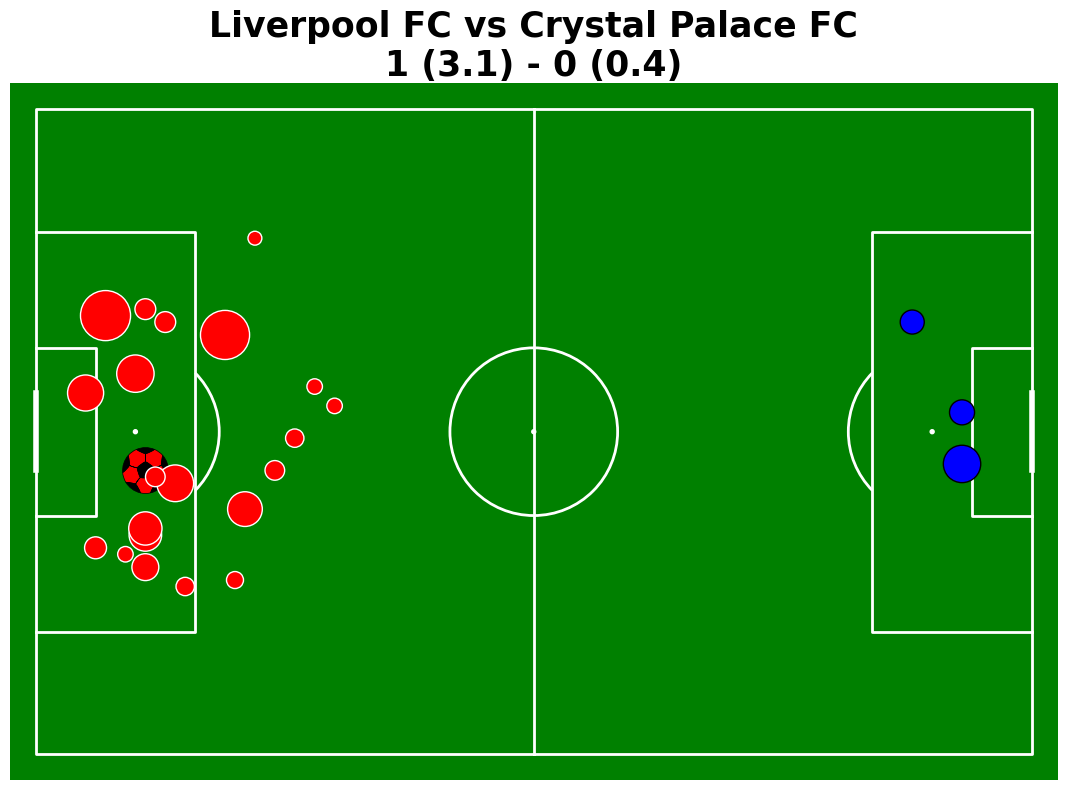

In [123]:
pitch = mplsoccer.Pitch(pitch_type="wyscout",
                       pitch_color="green",
                       line_color="#ffffff")
fig, ax = pitch.draw(figsize=(14, 8))

match_data = merged_data[merged_data["matchId"] == 2499733]

teamIds = match_data["teamId"].unique().tolist()
team1_data = match_data[match_data["teamId"] == teamIds[1]]
team2_data = match_data[match_data["teamId"] == teamIds[0]]

gteam1_data = team1_data[team1_data["goal"] == 1]
gteam2_data = team2_data[team2_data["goal"] == 1]

ngteam1_data = team1_data[team1_data["goal"] != 1]
ngteam2_data = team2_data[team2_data["goal"] != 1]

scatter = pitch.scatter(100-gteam1_data["startX"], 100-gteam1_data["startY"],
                        s=(gteam1_data["xG"] * 2500) + 100,
                        c="red",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(100-ngteam1_data["startX"], 100-ngteam1_data["startY"],
                        s=(ngteam1_data["xG"] * 2500) + 100,
                        c="red",
                        edgecolors='#ffffff',  # give the markers a white border
                        marker="o",
                        ax=ax)

scatter = pitch.scatter(gteam2_data["startX"], gteam2_data["startY"],
                        s=(gteam2_data["xG"] * 2500) + 100,
                        c="blue",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(ngteam2_data["startX"], ngteam2_data["startY"],
                        s=(ngteam2_data["xG"] * 2500) + 100,
                        c="blue",
                        edgecolors='#000000',  # give the markers a white border
                        marker="o",
                        ax=ax)

goals1 = team1_data["goal"].sum().round(1)
goals2 = team2_data["goal"].sum().round(1)

xg1 = team1_data["xG"].sum().round(1)
xg2 = team2_data["xG"].sum().round(1)

ax.set_title("Liverpool FC vs Crystal Palace FC"
             + "\n" + str(goals1) + " (" + str(xg1) + ") - " + str(goals2) + " (" + str(xg2) + ")",
             loc="center",
             color="#000000",
             pad=-80,
             fontsize=25,
             weight="bold")

# Import the codecs module
import codecs

# Function to remove escape sequences
def remove_escape_sequences(text):
    return codecs.decode(text, 'unicode_escape')

# Print details of goal-scoring events for team 1
print("Team 1 Goals:")
for index, row in gteam1_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")

# Print details of goal-scoring events for team 2
print("\nTeam 2 Goals:")
for index, row in gteam2_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")

In [124]:
import random

def random_match_id(merged_data):
    # Get unique values from the "matchId" column
    match_ids = merged_data["matchId"].unique()
    
    # Generate a random index within the range of unique match ids
    random_index = random.randint(0, len(match_ids) - 1)
    
    # Get the random match id
    random_match_id = match_ids[random_index]    
    return random_match_id

random_match_id(merged_data)

2499877

Team 1 Goals:
Minute: 19, Scorer: José Leonardo Ulloa, Shot Type: 0, Shot Distance: 4.47, Shot Angle: 82.87, xG: 0.69

Team 2 Goals:
Minute: 15, Scorer: Danilo Luiz da Silva, Shot Type: 1, Shot Distance: 14.04, Shot Angle: 31.75, xG: 0.91
Minute: 33, Scorer: Bernardo Mota Veiga de Carvalho e Silva, Shot Type: 1, Shot Distance: 16.4, Shot Angle: 22.35, xG: 0.96
Minute: 26, Scorer: Fernando Luiz Rosa, Shot Type: 2, Shot Distance: 15.26, Shot Angle: 25.61, xG: 0.84


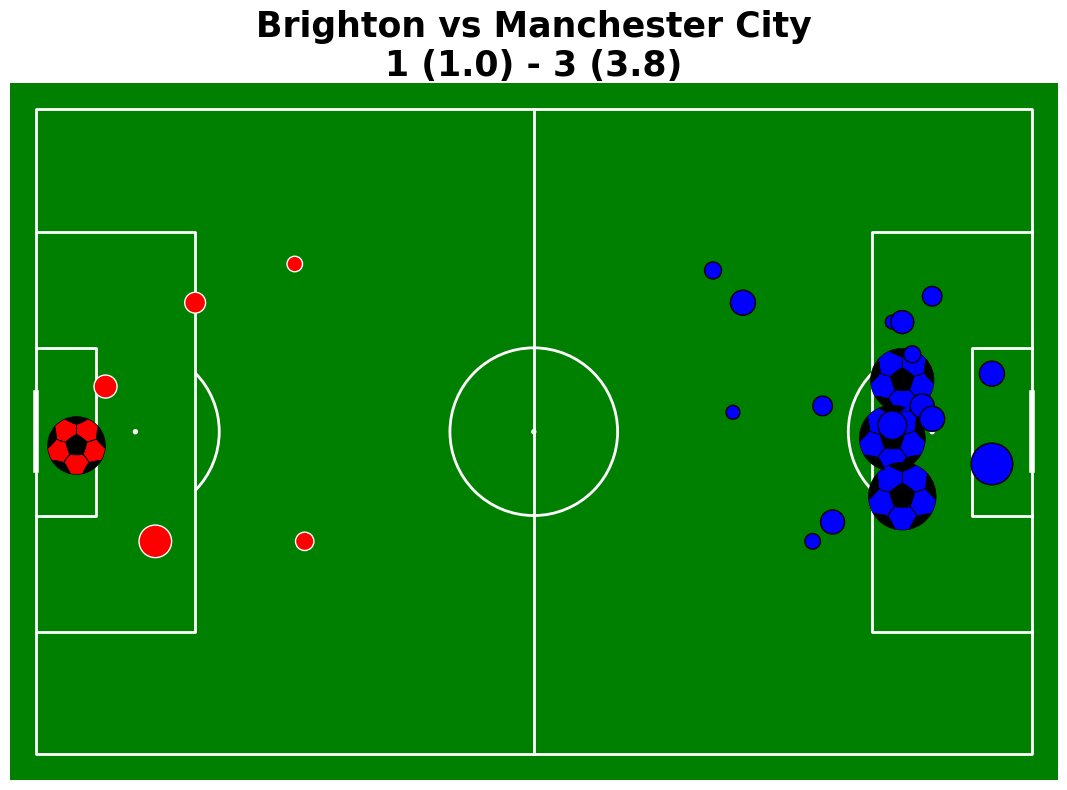

In [125]:
pitch = mplsoccer.Pitch(pitch_type="wyscout",
                       pitch_color="green",
                       line_color="#ffffff")
fig, ax = pitch.draw(figsize=(14, 8))

match_data = merged_data[merged_data["matchId"] == 2500024]

teamIds = match_data["teamId"].unique().tolist()
team1_data = match_data[match_data["teamId"] == teamIds[1]]
team2_data = match_data[match_data["teamId"] == teamIds[0]]

gteam1_data = team1_data[team1_data["goal"] == 1]
gteam2_data = team2_data[team2_data["goal"] == 1]

ngteam1_data = team1_data[team1_data["goal"] != 1]
ngteam2_data = team2_data[team2_data["goal"] != 1]

scatter = pitch.scatter(100-gteam1_data["startX"], 100-gteam1_data["startY"],
                        s=(gteam1_data["xG"] * 2500) + 100,
                        c="red",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(100-ngteam1_data["startX"], 100-ngteam1_data["startY"],
                        s=(ngteam1_data["xG"] * 2500) + 100,
                        c="red",
                        edgecolors='#ffffff',  # give the markers a white border
                        marker="o",
                        ax=ax)

scatter = pitch.scatter(gteam2_data["startX"], gteam2_data["startY"],
                        s=(gteam2_data["xG"] * 2500) + 100,
                        c="blue",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(ngteam2_data["startX"], ngteam2_data["startY"],
                        s=(ngteam2_data["xG"] * 2500) + 100,
                        c="blue",
                        edgecolors='#000000',  # give the markers a white border
                        marker="o",
                        ax=ax)

goals1 = team1_data["goal"].sum().round(1)
goals2 = team2_data["goal"].sum().round(1)

xg1 = team1_data["xG"].sum().round(1)
xg2 = team2_data["xG"].sum().round(1)

ax.set_title("Brighton vs Manchester City"
             + "\n" + str(goals1) + " (" + str(xg1) + ") - " + str(goals2) + " (" + str(xg2) + ")",
             loc="center",
             color="#000000",
             pad=-80,
             fontsize=25,
             weight="bold")

# Import the codecs module
import codecs

# Function to remove escape sequences
def remove_escape_sequences(text):
    return codecs.decode(text, 'unicode_escape')

# Print details of goal-scoring events for team 1
print("Team 1 Goals:")
for index, row in gteam1_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")

# Print details of goal-scoring events for team 2
print("\nTeam 2 Goals:")
for index, row in gteam2_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")

Team 1 Goals:
Minute: 14, Scorer: Cristiano Ronaldo dos Santos Aveiro, Shot Type: 1, Shot Distance: 1.41, Shot Angle: 150.26, xG: 0.72
Minute: 26, Scorer: Gareth Frank Bale, Shot Type: 1, Shot Distance: 18.03, Shot Angle: 24.99, xG: 0.47

Team 2 Goals:
Minute: 9, Scorer: Luis Alberto Suárez Díaz, Shot Type: 1, Shot Distance: 16.28, Shot Angle: 19.46, xG: 0.58
Minute: 6, Scorer: Lionel Andrés Messi Cuccittini, Shot Type: 1, Shot Distance: 13.93, Shot Angle: 30.3, xG: 0.69


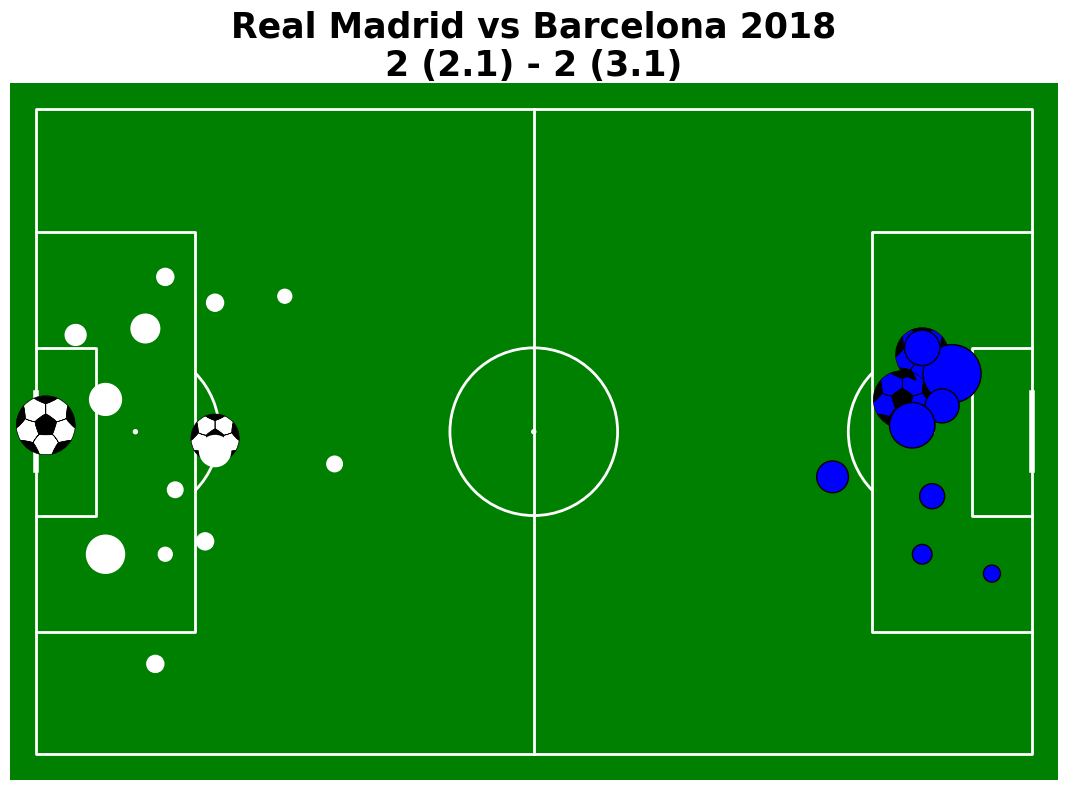

In [126]:
pitch = mplsoccer.Pitch(pitch_type="wyscout",
                       pitch_color="green",
                       line_color="#ffffff")
fig, ax = pitch.draw(figsize=(14, 8))

match_data = merged_data[merged_data["matchId"] == 2565907]

teamIds = match_data["teamId"].unique().tolist()
team1_data = match_data[match_data["teamId"] == teamIds[1]]
team2_data = match_data[match_data["teamId"] == teamIds[0]]

gteam1_data = team1_data[team1_data["goal"] == 1]
gteam2_data = team2_data[team2_data["goal"] == 1]

ngteam1_data = team1_data[team1_data["goal"] != 1]
ngteam2_data = team2_data[team2_data["goal"] != 1]

scatter = pitch.scatter(100-gteam1_data["startX"], 100-gteam1_data["startY"],
                        s=(gteam1_data["xG"] * 2500) + 100,
                        c="white",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(100-ngteam1_data["startX"], 100-ngteam1_data["startY"],
                        s=(ngteam1_data["xG"] * 2500) + 100,
                        c="white",
                        edgecolors='#ffffff',  # give the markers a white border
                        marker="o",
                        ax=ax)

scatter = pitch.scatter(gteam2_data["startX"], gteam2_data["startY"],
                        s=(gteam2_data["xG"] * 2500) + 100,
                        c="blue",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(ngteam2_data["startX"], ngteam2_data["startY"],
                        s=(ngteam2_data["xG"] * 2500) + 100,
                        c="blue",
                        edgecolors='#000000',  # give the markers a white border
                        marker="o",
                        ax=ax)

goals1 = team1_data["goal"].sum().round(1)
goals2 = team2_data["goal"].sum().round(1)

xg1 = team1_data["xG"].sum().round(1)
xg2 = team2_data["xG"].sum().round(1)

ax.set_title("Real Madrid vs Barcelona 2018"
             + "\n" + str(goals1) + " (" + str(xg1) + ") - " + str(goals2) + " (" + str(xg2) + ")",
             loc="center",
             color="#000000",
             pad=-80,
             fontsize=25,
             weight="bold")

# Import the codecs module
import codecs

# Function to remove escape sequences
def remove_escape_sequences(text):
    return codecs.decode(text, 'unicode_escape')

# Print details of goal-scoring events for team 1
print("Team 1 Goals:")
for index, row in gteam1_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")

# Print details of goal-scoring events for team 2
print("\nTeam 2 Goals:")
for index, row in gteam2_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")

Team 1 Goals:

Team 2 Goals:
Minute: 4, Scorer: Robert Lewandowski, Shot Type: 1, Shot Distance: 13.89, Shot Angle: 28.47, xG: 0.97
Minute: 13, Scorer: James David Rodríguez Rubio, Shot Type: 1, Shot Distance: 7.07, Shot Angle: 58.74, xG: 0.96
Minute: 22, Scorer: Thomas Müller, Shot Type: 1, Shot Distance: 10.63, Shot Angle: 30.0, xG: 0.94
Minute: 43, Scorer: Robert Lewandowski, Shot Type: 1, Shot Distance: 3.0, Shot Angle: 106.26, xG: 0.92
Minute: 45, Scorer: Franck Bilal Ribéry, Shot Type: 1, Shot Distance: 16.4, Shot Angle: 17.55, xG: 0.85
Minute: 41, Scorer: Robert Lewandowski, Shot Type: 1, Shot Distance: 3.16, Shot Angle: 104.04, xG: 0.95


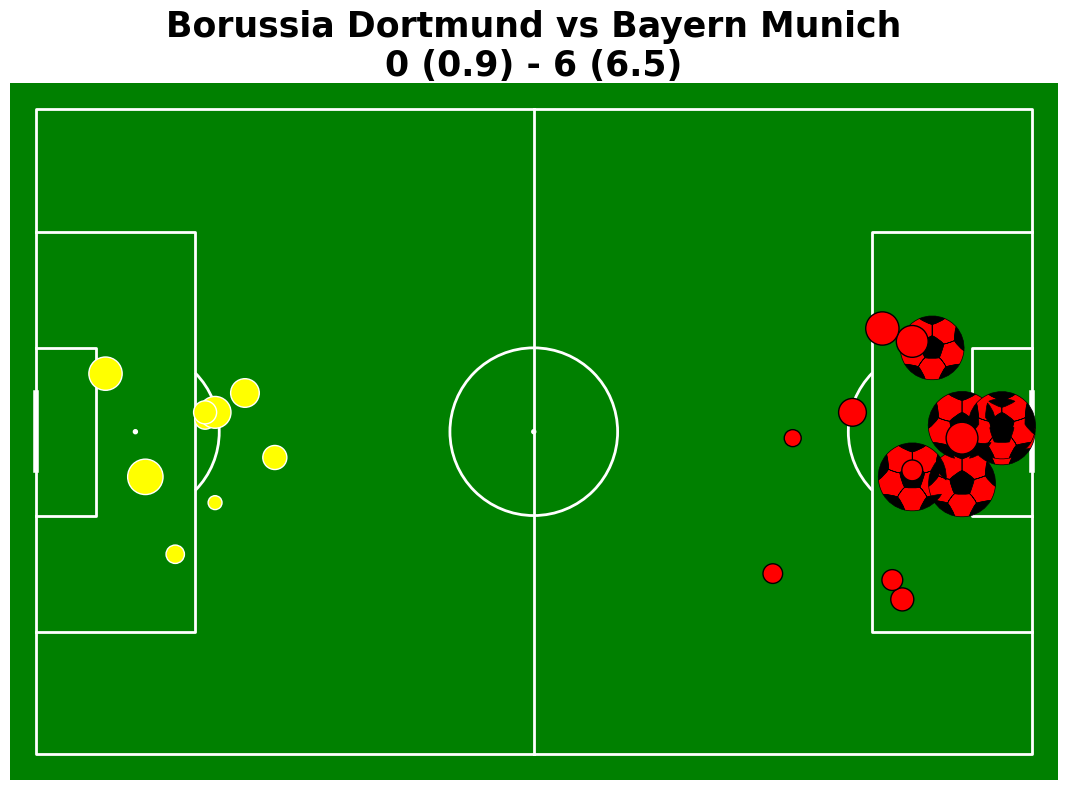

In [127]:
pitch = mplsoccer.Pitch(pitch_type="wyscout",
                       pitch_color="green",
                       line_color="#ffffff")
fig, ax = pitch.draw(figsize=(14, 8))

match_data = merged_data[merged_data["matchId"] == 2516982]

teamIds = match_data["teamId"].unique().tolist()
team1_data = match_data[match_data["teamId"] == teamIds[1]]
team2_data = match_data[match_data["teamId"] == teamIds[0]]

gteam1_data = team1_data[team1_data["goal"] == 1]
gteam2_data = team2_data[team2_data["goal"] == 1]

ngteam1_data = team1_data[team1_data["goal"] != 1]
ngteam2_data = team2_data[team2_data["goal"] != 1]

scatter = pitch.scatter(100-gteam1_data["startX"], 100-gteam1_data["startY"],
                        s=(gteam1_data["xG"] * 2500) + 100,
                        c="yellow",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(100-ngteam1_data["startX"], 100-ngteam1_data["startY"],
                        s=(ngteam1_data["xG"] * 2500) + 100,
                        c="yellow",
                        edgecolors='#ffffff',  # give the markers a white border
                        marker="o",
                        ax=ax)

scatter = pitch.scatter(gteam2_data["startX"], gteam2_data["startY"],
                        s=(gteam2_data["xG"] * 2500) + 100,
                        c="red",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(ngteam2_data["startX"], ngteam2_data["startY"],
                        s=(ngteam2_data["xG"] * 2500) + 100,
                        c="red",
                        edgecolors='#000000',  # give the markers a white border
                        marker="o",
                        ax=ax)

goals1 = team1_data["goal"].sum().round(1)
goals2 = team2_data["goal"].sum().round(1)

xg1 = team1_data["xG"].sum().round(1)
xg2 = team2_data["xG"].sum().round(1)

ax.set_title("Borussia Dortmund vs Bayern Munich"
             + "\n" + str(goals1) + " (" + str(xg1) + ") - " + str(goals2) + " (" + str(xg2) + ")",
             loc="center",
             color="#000000",
             pad=-80,
             fontsize=25,
             weight="bold")

# Import the codecs module
import codecs

# Function to remove escape sequences
def remove_escape_sequences(text):
    return codecs.decode(text, 'unicode_escape')

# Print details of goal-scoring events for team 1
print("Team 1 Goals:")
for index, row in gteam1_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")

# Print details of goal-scoring events for team 2
print("\nTeam 2 Goals:")
for index, row in gteam2_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")

Team 1 Goals:
Minute: 25, Scorer: Edinson Roberto Cavani Gómez, Shot Type: 1, Shot Distance: 7.81, Shot Angle: 41.63, xG: 0.84
Minute: 18, Scorer: Christopher Nkunku, Shot Type: 1, Shot Distance: 21.19, Shot Angle: 20.28, xG: 0.71

Team 2 Goals:
Minute: 1, Scorer: Moussa Konaté, Shot Type: 1, Shot Distance: 14.32, Shot Angle: 14.25, xG: 0.29
Minute: 34, Scorer: Moussa Konaté, Shot Type: 1, Shot Distance: 20.62, Shot Angle: 8.89, xG: 0.67


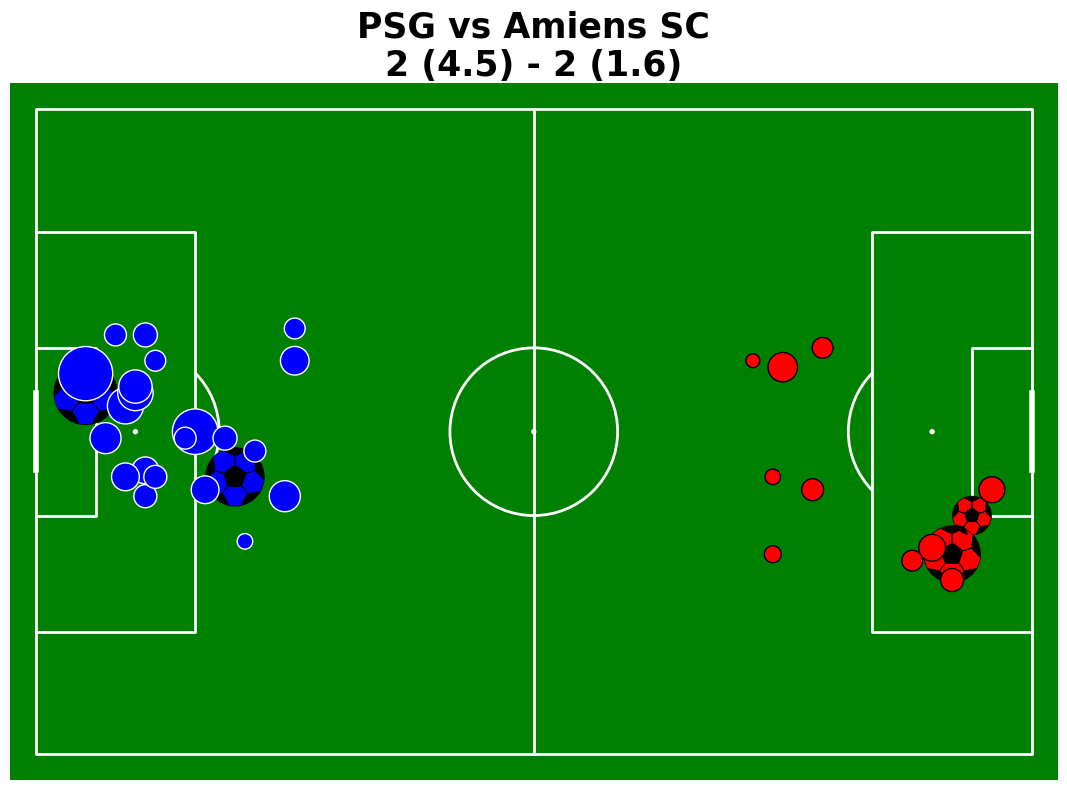

In [128]:
pitch = mplsoccer.Pitch(pitch_type="wyscout",
                       pitch_color="green",
                       line_color="#ffffff")
fig, ax = pitch.draw(figsize=(14, 8))

match_data = merged_data[merged_data["matchId"] == 2501036]

teamIds = match_data["teamId"].unique().tolist()
team1_data = match_data[match_data["teamId"] == teamIds[1]]
team2_data = match_data[match_data["teamId"] == teamIds[0]]

gteam1_data = team1_data[team1_data["goal"] == 1]
gteam2_data = team2_data[team2_data["goal"] == 1]

ngteam1_data = team1_data[team1_data["goal"] != 1]
ngteam2_data = team2_data[team2_data["goal"] != 1]

scatter = pitch.scatter(100-gteam1_data["startX"], 100-gteam1_data["startY"],
                        s=(gteam1_data["xG"] * 2500) + 100,
                        c="blue",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(100-ngteam1_data["startX"], 100-ngteam1_data["startY"],
                        s=(ngteam1_data["xG"] * 2500) + 100,
                        c="blue",
                        edgecolors='#ffffff',  # give the markers a white border
                        marker="o",
                        ax=ax)

scatter = pitch.scatter(gteam2_data["startX"], gteam2_data["startY"],
                        s=(gteam2_data["xG"] * 2500) + 100,
                        c="red",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(ngteam2_data["startX"], ngteam2_data["startY"],
                        s=(ngteam2_data["xG"] * 2500) + 100,
                        c="red",
                        edgecolors='#000000',  # give the markers a white border
                        marker="o",
                        ax=ax)

goals1 = team1_data["goal"].sum().round(1)
goals2 = team2_data["goal"].sum().round(1)

xg1 = team1_data["xG"].sum().round(1)
xg2 = team2_data["xG"].sum().round(1)

ax.set_title("PSG vs Amiens SC"
             + "\n" + str(goals1) + " (" + str(xg1) + ") - " + str(goals2) + " (" + str(xg2) + ")",
             loc="center",
             color="#000000",
             pad=-80,
             fontsize=25,
             weight="bold")

# Import the codecs module
import codecs

# Function to remove escape sequences
def remove_escape_sequences(text):
    return codecs.decode(text, 'unicode_escape')

# Print details of goal-scoring events for team 1
print("Team 1 Goals:")
for index, row in gteam1_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")

# Print details of goal-scoring events for team 2
print("\nTeam 2 Goals:")
for index, row in gteam2_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")

Additional Coding 

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Define logistic regression pipeline
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression())
])

# Define the parameter grid for logistic regression
param_grid_log_reg = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2']
}

# Perform GridSearchCV with multiple scoring parameters
grid_search_log_reg = GridSearchCV(log_reg_pipeline, param_grid_log_reg, scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'], cv=5, refit='precision')
grid_search_log_reg.fit(X_train, y_train)

# Get the best parameters
best_params_log_reg = grid_search_log_reg.best_params_
print("Best Parameters for Logistic Regression:", best_params_log_reg)

# Get the best score
best_score_log_reg = grid_search_log_reg.best_score_
print("Best Precision Score:", best_score_log_reg)



Best Parameters for Logistic Regression: {'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2'}
Best Precision Score: 0.728058344058344


In [133]:
# Define Random Forest pipeline
rf_pipeline = Pipeline([
    ('randomforest', RandomForestClassifier())
])

# Define the parameter grid for Random Forest
param_grid_rf = {
    'randomforest__n_estimators': [50, 100, 150],
    'randomforest__max_depth': [None, 5, 10],
    'randomforest__min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'], cv=5, refit='precision')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and score for Random Forest
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print("Best Parameters for Random Forest:", best_params_rf)
print("Best Precision Score for Random Forest:", best_score_rf)


Best Parameters for Random Forest: {'randomforest__max_depth': 5, 'randomforest__min_samples_split': 10, 'randomforest__n_estimators': 50}
Best Precision Score for Random Forest: 0.7032500582201373


In [134]:
# Define GBM pipeline
gbm_pipeline = Pipeline([
    ('gradientboosting', GradientBoostingClassifier())
])

# Define the parameter grid for GBM
param_grid_gbm = {
    'gradientboosting__n_estimators': [50, 100, 150],
    'gradientboosting__learning_rate': [0.01, 0.1, 0.5],
    'gradientboosting__max_depth': [3, 5, 7]
}

# Perform GridSearchCV for GBM
grid_search_gbm = GridSearchCV(gbm_pipeline, param_grid_gbm, scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'], cv=5, refit='precision')
grid_search_gbm.fit(X_train, y_train)

# Get the best parameters and score for GBM
best_params_gbm = grid_search_gbm.best_params_
best_score_gbm = grid_search_gbm.best_score_
print("Best Parameters for Gradient Boosting Machine:", best_params_gbm)
print("Best Precision Score for Gradient Boosting Machine:", best_score_gbm)

Best Parameters for Gradient Boosting Machine: {'gradientboosting__learning_rate': 0.01, 'gradientboosting__max_depth': 3, 'gradientboosting__n_estimators': 150}
Best Precision Score for Gradient Boosting Machine: 0.7124014469519464


Logistic Regression (Oversampled and Tuned):
Accuracy: 0.690169882896256
Precision: 0.20281892021022455
Recall: 0.6690307328605201
F1-score: 0.31127406049495876
ROC AUC: 0.6808357127506064
[[7520 3337]
 [ 420  849]]


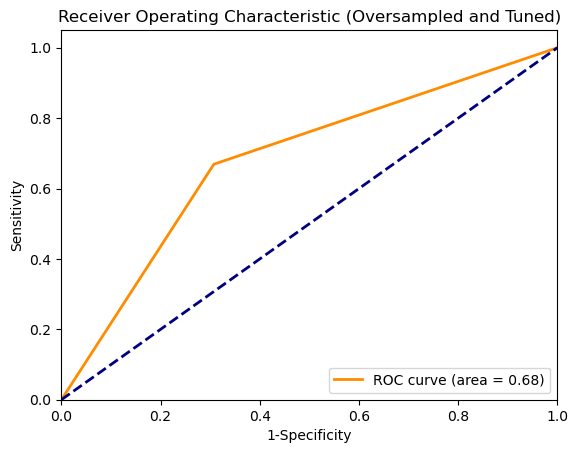

In [151]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

logistic_regression_oversampled_tuned = LogisticRegression(C=0.001, penalty='l2')
logistic_regression_oversampled_tuned.fit(X_train_resampled, y_train_resampled)
y_pred_lr_oversampled_tuned = logistic_regression_oversampled_tuned.predict(X_test)

lr_oversampled_tuned_probabilities = logistic_regression_oversampled_tuned.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_lr_oversampled_tuned = accuracy_score(y_test, y_pred_lr_oversampled_tuned)
precision_lr_oversampled_tuned = precision_score(y_test, y_pred_lr_oversampled_tuned)
recall_lr_oversampled_tuned = recall_score(y_test, y_pred_lr_oversampled_tuned)
f1_lr_oversampled_tuned = f1_score(y_test, y_pred_lr_oversampled_tuned)
roc_auc_lr_oversampled_tuned = roc_auc_score(y_test, y_pred_lr_oversampled_tuned)
cmatrix_lr_oversampled_tuned = confusion_matrix(y_test, y_pred_lr_oversampled_tuned)

# Plot ROC curve
fpr_lr_oversampled_tuned, tpr_lr_oversampled_tuned, thresholds_lr_oversampled_tuned = roc_curve(y_test, y_pred_lr_oversampled_tuned)
roc_auc_lr_curve_oversampled_tuned = auc(fpr_lr_oversampled_tuned, tpr_lr_oversampled_tuned)


print("Logistic Regression (Oversampled and Tuned):")
print(f"Accuracy: {accuracy_lr_oversampled_tuned}")
print(f"Precision: {precision_lr_oversampled_tuned}")
print(f"Recall: {recall_lr_oversampled_tuned}")
print(f"F1-score: {f1_lr_oversampled_tuned}")
print(f"ROC AUC: {roc_auc_lr_oversampled_tuned}")
print(f"{cmatrix_lr_oversampled_tuned}")


# Plot ROC curve
plt.figure()
plt.plot(fpr_lr_oversampled_tuned, tpr_lr_oversampled_tuned, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr_curve_oversampled_tuned)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (Oversampled and Tuned)')
plt.legend(loc="lower right")
plt.show()

Random Forest (Oversampled and Tuned):
Accuracy: 0.7011380504700643
Precision: 0.1993872861884095
Recall: 0.6154452324665091
F1-score: 0.30119552641727726
ROC AUC: 0.6632996632996633
[[7721 3136]
 [ 488  781]]


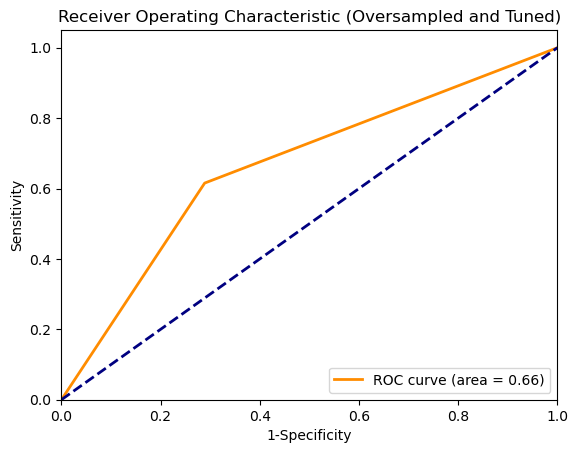

In [150]:
random_forest_oversampled_tuned = RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=50, random_state=42)
random_forest_oversampled_tuned.fit(X_train_resampled, y_train_resampled)
y_pred_rf_oversampled_tuned = random_forest_oversampled_tuned.predict(X_test)

rf_oversampled_tuned_probabilities = random_forest_oversampled_tuned.predict_proba(X_test)[:, 1]


# Evaluation
accuracy_rf_oversampled_tuned = accuracy_score(y_test, y_pred_rf_oversampled_tuned)
precision_rf_oversampled_tuned = precision_score(y_test, y_pred_rf_oversampled_tuned)
recall_rf_oversampled_tuned = recall_score(y_test, y_pred_rf_oversampled_tuned)
f1_rf_oversampled_tuned = f1_score(y_test, y_pred_rf_oversampled_tuned)
roc_auc_rf_oversampled_tuned = roc_auc_score(y_test, y_pred_rf_oversampled_tuned)
cmatrix_rf_oversampled_tuned = confusion_matrix(y_test, y_pred_rf_oversampled_tuned)

# Plot ROC curve
fpr_rf_oversampled_tuned, tpr_rf_oversampled_tuned, thresholds_rf_oversampled_tuned = roc_curve(y_test, y_pred_rf_oversampled_tuned)
roc_auc_rf_curve_oversampled_tuned = auc(fpr_rf_oversampled_tuned, tpr_rf_oversampled_tuned)


print("Random Forest (Oversampled and Tuned):")
print(f"Accuracy: {accuracy_rf_oversampled_tuned}")
print(f"Precision: {precision_rf_oversampled_tuned}")
print(f"Recall: {recall_rf_oversampled_tuned}")
print(f"F1-score: {f1_rf_oversampled_tuned}")
print(f"ROC AUC: {roc_auc_rf_oversampled_tuned}")
print(f"{cmatrix_rf_oversampled_tuned}")


# Plot ROC curve
plt.figure()
plt.plot(fpr_rf_oversampled_tuned, tpr_rf_oversampled_tuned, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf_curve_oversampled_tuned)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (Oversampled and Tuned)')
plt.legend(loc="lower right")
plt.show()

Gradient Boosting Classifier (oversampled_tuned):
Accuracy: 0.6976744186046512
Precision: 0.20015011258443832
Recall: 0.6304176516942475
F1-score: 0.3038359285985568
ROC AUC: 0.667976625423434
[[7660 3197]
 [ 469  800]]


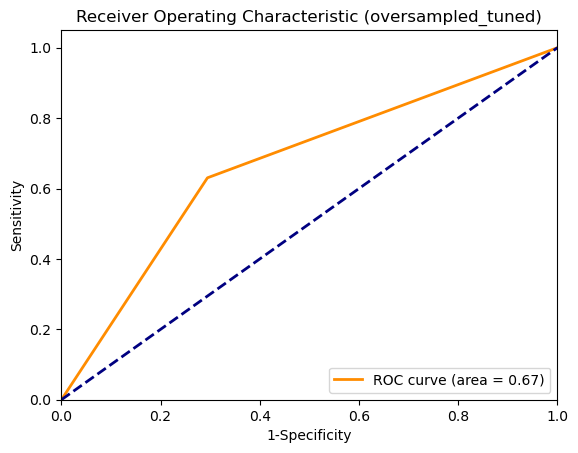

In [146]:
gbm_oversampled_tuned = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=150)
gbm_oversampled_tuned.fit(X_train_resampled, y_train_resampled)
y_pred_gbm_oversampled_tuned = gbm_oversampled_tuned.predict(X_test)

# Evaluation
accuracy_gbm_oversampled_tuned = accuracy_score(y_test, y_pred_gbm_oversampled_tuned)
precision_gbm_oversampled_tuned = precision_score(y_test, y_pred_gbm_oversampled_tuned)
recall_gbm_oversampled_tuned = recall_score(y_test, y_pred_gbm_oversampled_tuned)
f1_gbm_oversampled_tuned = f1_score(y_test, y_pred_gbm_oversampled_tuned)
roc_auc_gbm_oversampled_tuned = roc_auc_score(y_test, y_pred_gbm_oversampled_tuned)
cmatrix_gbm_oversampled_tuned = confusion_matrix(y_test, y_pred_gbm_oversampled_tuned)

# Plot ROC curve
fpr_gbm_oversampled_tuned, tpr_gbm_oversampled_tuned, thresholds_gbm_oversampled_tuned = roc_curve(y_test, y_pred_gbm_oversampled_tuned)
roc_auc_gbm_curve_oversampled_tuned = auc(fpr_gbm_oversampled_tuned, tpr_gbm_oversampled_tuned)

print("Gradient Boosting Classifier (oversampled_tuned):")
print(f"Accuracy: {accuracy_gbm_oversampled_tuned}")
print(f"Precision: {precision_gbm_oversampled_tuned}")
print(f"Recall: {recall_gbm_oversampled_tuned}")
print(f"F1-score: {f1_gbm_oversampled_tuned}")
print(f"ROC AUC: {roc_auc_gbm_oversampled_tuned}")
print(f"{cmatrix_gbm_oversampled_tuned}")

# Plot ROC curve
plt.figure()
plt.plot(fpr_gbm_oversampled_tuned, tpr_gbm_oversampled_tuned, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gbm_curve_oversampled_tuned)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (oversampled_tuned)')
plt.legend(loc="lower right")
plt.show()

In [159]:
rf_oversampled_tuned_probabilities

array([0.25482225, 0.72760827, 0.64625419, ..., 0.19808773, 0.17092841,
       0.19779133])

In [153]:
goal_prediction_2 = logistic_regression_oversampled_tuned.predict(np.array(merged_data[xCols]))

In [160]:
goal_prediction_3 = random_forest_oversampled_tuned.predict(np.array(merged_data[xCols]))

In [154]:
goal_predProbs_2 = logistic_regression_oversampled_tuned.predict_proba(merged_data[xCols])[:, 1]

In [161]:
goal_predProbs_3 = random_forest_oversampled_tuned.predict_proba(merged_data[xCols])[:, 1]

In [155]:
merged_data["xG_2"] = goal_predProbs_2

In [162]:
merged_data["xG_3"] = goal_predProbs_3

In [166]:
merged_data.head()

playerId  matchId  teamId  matchPeriod    eventSec         id  startY  \
0     25413  2499719    1609            0   94.595788  177959212      41   
1     26150  2499719    1631            0  179.854785  177959247      52   
2     14763  2499719    1631            0  254.745027  177959280      52   
3      7868  2499719    1609            0  425.824035  177959289      33   
4      7868  2499719    1609            0  815.462015  177959429      30   

   startX  goal  firstName  ... foot  height  weight  role.name  shot_foot  \
0      88     1  Alexandre  ...    3   175.0    73.0          1          1   
1      85     0      Riyad  ...    2   179.0    62.0          3          1   
2      96     1     Shinji  ...    3   174.0    70.0          1          0   
3      81     0       Alex  ...    3   175.0    70.0          3          2   
4      75     0       Alex  ...    3   175.0    70.0          3          1   

    shotDist  shotAngle    xG      xG_2      xG_3  
0  15.000000  24.670745  0.79  0.517237  0.697543  
1  15.132746  29.396053  0.23  0.544904  0.578818  
2   4.472136  82.874984  0.96  0.909560  0.786858  
3  25.495098  13.482061  0.04  0.220940  0.103628  
4  32.015621  11.211618  0.04  0.123130  0.125926  

[5 rows x 21 columns]

Team 1 Goals:
Minute: 1, Scorer: Alexandre Lacazette, Shot Type: 1, Shot Distance: 15.0, Shot Angle: 24.67, xG: 0.6975429001915205
Minute: 46, Scorer: Daniel Nii Tackie Mensah Welbeck, Shot Type: 1, Shot Distance: 8.0, Shot Angle: 53.13, xG: 0.7619511964631921
Minute: 37, Scorer: Aaron Ramsey, Shot Type: 1, Shot Distance: 14.32, Shot Angle: 14.25, xG: 0.37363589932211494
Minute: 39, Scorer: Olivier Giroud, Shot Type: 0, Shot Distance: 10.82, Shot Angle: 35.48, xG: 0.6373933129772082

Team 2 Goals:
Minute: 4, Scorer: Shinji Okazaki, Shot Type: 0, Shot Distance: 4.47, Shot Angle: 82.87, xG: 0.7868576152659075
Minute: 28, Scorer: Jamie Vardy, Shot Type: 1, Shot Distance: 7.21, Shot Angle: 53.13, xG: 0.7665016387666351
Minute: 10, Scorer: Jamie Vardy, Shot Type: 0, Shot Distance: 8.94, Shot Angle: 45.0, xG: 0.707338556388335


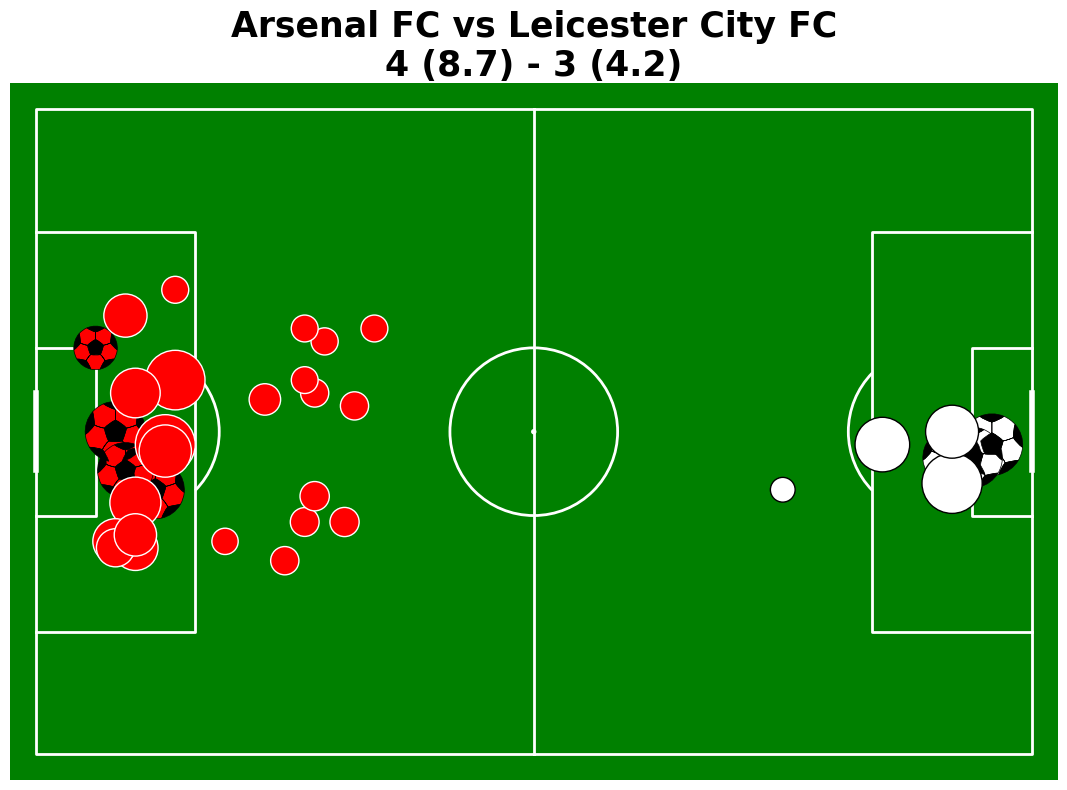

In [164]:
pitch = mplsoccer.Pitch(pitch_type="wyscout",
                       pitch_color="green",
                       line_color="#ffffff")
fig, ax = pitch.draw(figsize=(14, 8))
match_data = merged_data[merged_data["matchId"] == 2499719]
team1_data = match_data[match_data["teamId"] == 1609]
team2_data = match_data[match_data["teamId"] == 1631]

gteam1_data = team1_data[team1_data["goal"] == 1]
gteam2_data = team2_data[team2_data["goal"] == 1]

ngteam1_data = team1_data[team1_data["goal"] != 1]
ngteam2_data = team2_data[team2_data["goal"] != 1]

scatter = pitch.scatter(100-gteam1_data["startX"], 100-gteam1_data["startY"],
                        s=(gteam1_data["xG_3"] * 2500) + 100,
                        c="red",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(100-ngteam1_data["startX"], 100-ngteam1_data["startY"],
                        s=(ngteam1_data["xG_3"] * 2500) + 100,
                        c="red",
                        edgecolors='#ffffff',  # give the markers a white border
                        marker="o",
                        ax=ax)

scatter = pitch.scatter(gteam2_data["startX"], gteam2_data["startY"],
                        s=(gteam2_data["xG_3"] * 2500) + 100,
                        c="white",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(ngteam2_data["startX"], ngteam2_data["startY"],
                        s=(ngteam2_data["xG_3"] * 2500) + 100,
                        c="white",
                        edgecolors='#000000',  # give the markers a white border
                        marker="o",
                        ax=ax)

xg1 = team1_data["xG_3"].sum().round(1)
xg2 = team2_data["xG_3"].sum().round(1)

ax.set_title("Arsenal FC vs Leicester City FC"
             + "\n4 (" + str(xg1) + ") - 3 (" + str(xg2) + ")",
             loc="center",
             color="#000000",
             pad=-80,
             fontsize=25,
             weight="bold")

# Import the codecs module
import codecs

# Function to remove escape sequences
def remove_escape_sequences(text):
    return codecs.decode(text, 'unicode_escape')

# Print details of goal-scoring events for team 1
print("Team 1 Goals:")
for index, row in gteam1_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG_3']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")

# Print details of goal-scoring events for team 2
print("\nTeam 2 Goals:")
for index, row in gteam2_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG_3']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")


Team 1 Goals:

Team 2 Goals:
Minute: 4, Scorer: Aaron Mooy, Shot Type: 1, Shot Distance: 18.87, Shot Angle: 20.63, xG: 0.37563230100001327


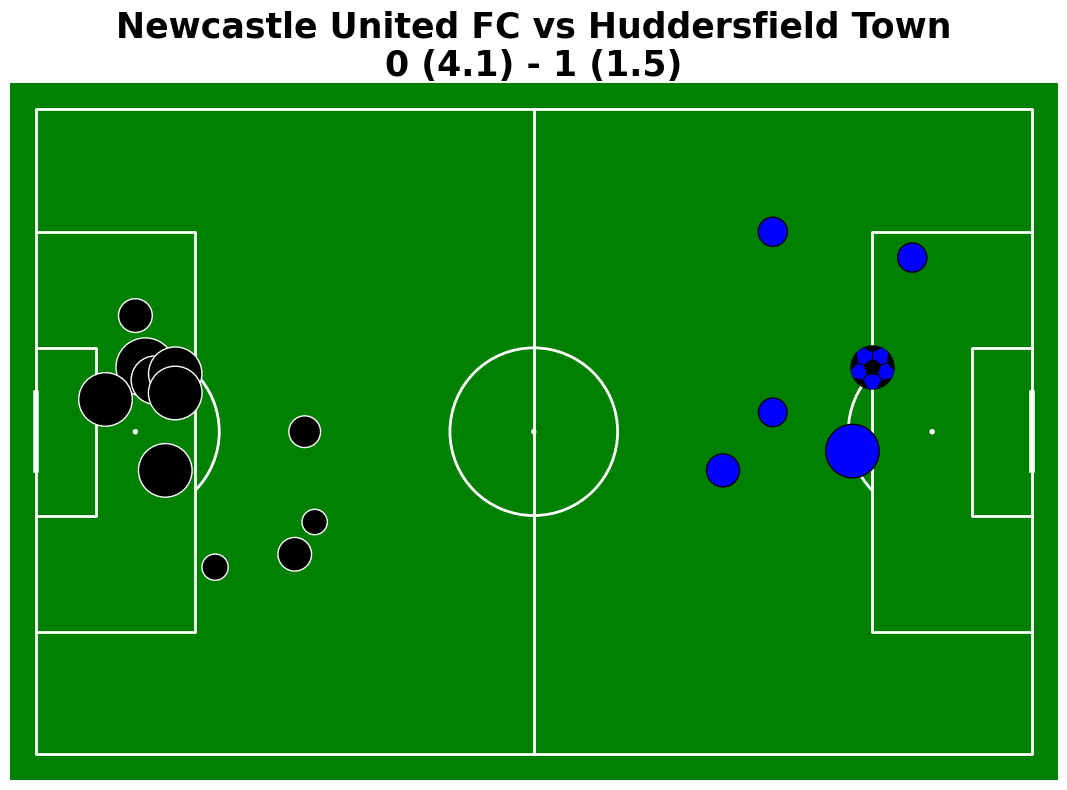

In [167]:
pitch = mplsoccer.Pitch(pitch_type="wyscout",
                       pitch_color="green",
                       line_color="#ffffff")
fig, ax = pitch.draw(figsize=(14, 8))
match_data = merged_data[merged_data["matchId"] == 2499731]
teamIds = match_data["teamId"].unique().tolist()
team1_data = match_data[match_data["teamId"] == teamIds[0]]
team2_data = match_data[match_data["teamId"] == teamIds[1]]

gteam1_data = team1_data[team1_data["goal"] == 1]
gteam2_data = team2_data[team2_data["goal"] == 1]

ngteam1_data = team1_data[team1_data["goal"] != 1]
ngteam2_data = team2_data[team2_data["goal"] != 1]

scatter = pitch.scatter(100-gteam1_data["startX"], 100-gteam1_data["startY"],
                        s=(gteam1_data["xG_3"] * 2500) + 100,
                        c="black",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(100-ngteam1_data["startX"], 100-ngteam1_data["startY"],
                        s=(ngteam1_data["xG_3"] * 2500) + 100,
                        c="black",
                        edgecolors='#ffffff',  # give the markers a white border
                        marker="o",
                        ax=ax)

scatter = pitch.scatter(gteam2_data["startX"], gteam2_data["startY"],
                        s=(gteam2_data["xG_3"] * 2500) + 100,
                        c="blue",
                        edgecolors='#000000',  # give the markers a white border
                        marker="football",
                        ax=ax)
scatter = pitch.scatter(ngteam2_data["startX"], ngteam2_data["startY"],
                        s=(ngteam2_data["xG_3"] * 2500) + 100,
                        c="blue",
                        edgecolors='#000000',  # give the markers a white border
                        marker="o",
                        ax=ax)

goals1 = team1_data["goal"].sum().round(1)
goals2 = team2_data["goal"].sum().round(1)
xg1 = team1_data["xG_3"].sum().round(1)
xg2 = team2_data["xG_3"].sum().round(1)

ax.set_title("Newcastle United FC vs Huddersfield Town"
             + "\n" + str(goals1) + " (" + str(xg1) + ") - " + str(goals2) + " (" + str(xg2) + ")",
             loc="center",
             color="#000000",
             pad=-80,
             fontsize=25,
             weight="bold")

# Import the codecs module
import codecs

# Function to remove escape sequences
def remove_escape_sequences(text):
    return codecs.decode(text, 'unicode_escape')

# Print details of goal-scoring events for team 1
print("Team 1 Goals:")
for index, row in gteam1_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG_3']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")

# Print details of goal-scoring events for team 2
print("\nTeam 2 Goals:")
for index, row in gteam2_data.iterrows():
    minute = int(row['eventSec'] // 60)  # Convert eventSec to minutes
    scorer = remove_escape_sequences(row['firstName'] + ' ' + row['lastName'])
    shot_type = row['shot_foot']
    shot_dist = round(row['shotDist'], 2)  # Round shot distance to 2 decimal places
    shot_angle = round(row['shotAngle'], 2)  # Round shot angle to 2 decimal places
    xg = row['xG_3']
    print(f"Minute: {minute}, Scorer: {scorer}, Shot Type: {shot_type}, Shot Distance: {shot_dist}, Shot Angle: {shot_angle}, xG: {xg}")